
# Project: US NICS Gun Registration and Census Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will be analysing the gun registration dataset and census dataset. The original source of datasets are from <a href="https://www.census.gov/">Census</a> and <a href="https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md">NICS</a>. The data from NICS (National Instant Criminal Background Check System) is used for background checks for the prospective buyer to buy firearms and/or explosives. The excel file of dataset for NICS is downloaded from 
<a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx">nics.xlsx</a>. The census dataset provides information of the people in all states of United states with most of the data is from the year 2016 and can be downloaded as csv file from <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv">US census data.csv</a>.

> Utilizing this dataset, I will be exploring the trend of gun registration over the years for the states of United States. Further analysis will be done to see the correlation of census data like population and income with the gun registration.

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

> The first step is to analyse both the datasets, looking into the variables and features, info, first few rows using head(), and checking for the missing and duplicated data. 

In [2]:
#loading of the census and guns datasets
df_census = pd.read_csv('/Users/Divyakaur/Desktop/investigate-dataset/ncis-and-census-data/U.S. Census Data.csv')
df_guns = pd.read_excel('/Users/Divyakaur/Desktop/investigate-dataset/ncis-and-census-data/gun_data.xlsx')

### Looking into the census data

In [3]:
#looking into first five rows of the census data set
df_census.head()

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   
2  Population, percent change - April 1, 2010 (es...       NaN      1.70%   
3                  Population, Census, April 1, 2010       NaN  4,779,736   
4  Persons under 5 years, percent, July 1, 2016, ...       NaN      6.00%   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2    4.50%      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  710,231  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4    7.30%      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

   ... South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0  ...       865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1  ...       814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2  ...        0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3  ...       814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4  ...        0.071     0.061       7.20%      8.30%    4.90%      6.10%   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  
2      8.40%        -1.20%      1.60%    3.90%  
3  6,724,540     1,852,994  5,686,986  563,626  
4      6.20%         5.50%      5.80%    6.50%  

[5 rows x 52 columns]

In [4]:
#looking into the shape of the census dataset
df_census.shape

(85, 52)

In [5]:
#looking into different columns in the dataset
df_census.columns

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [6]:
#looking for missing values
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [7]:
#looking for duplicated values
df_census.duplicated().sum()

3

In [8]:
#looking for the types of each column
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [9]:
#Looking into the rows of the Fact column of census datatset
df_census.Fact.unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [10]:
df_census['Fact Note'].unique()

array([nan, '(a)', '(b)', '(c)',
       'Includes data not distributed by county.',
       'Includes persons reporting only one race',
       'Hispanics may be of any race, so also are included in applicable race categories',
       'Economic Census - Puerto Rico data are not comparable to U.S. Economic Census data',
       'Either no or too few sample observations were available to compute an estimate, or a ratio of medians cannot be calculated because one or both of the median estimates falls in the lowest or upper interval of an open ended distribution.',
       'Suppressed to avoid disclosure of confidential information',
       'Fewer than 25 firms', 'Footnote on this item in place of data',
       'Not available', 'Suppressed; does not meet publication standards',
       'Not applicable',
       'Value greater than zero but less than half unit of measure shown'],
      dtype=object)

### General Properties

> Based on the initial observation, the census data has 85 rows and 52 columns. Column 1 and column 2 are Fact and Fact Notes whereas column 3 to 52 are states of United states. The data has 3 duplicated columns and around 20 missing values. 

#### Several important points to note:
1. Fact column shows total population estimates for the year 2010 and 2016 for all the states. 
2. Few rows show percentage of population of age under 5 years , under 18 years and 65+ years for years 2010 and 2016.
3. Other rows shows the percentage of population of different race for year 2016.
4. Fact rows also show the percentage of population having education for high school and bachelor or higher.
5. Other information are employment, housing units, annual payroll, median household income, per capita income, owner occupied housing units, civilian labor force for 2011-2015.
6. Men and women, veteran owned firms, retail sales for the year 2012.
7. Other rows are population per square mile and land area in square miles for the year 2010 and FIPS Code.
8. Fact Note column shows the information about the fact column. 

More detailed information can be found in the website <a href="https://www.census.gov/">Census</a>.


## Looking into the guns registration dataset

In [11]:
# looking into the dataset using head 
df_guns.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [12]:
#looking into the number of rows and columns in the dataframe
df_guns.shape

(12485, 27)

In [13]:
#looking into the columns 
df_guns.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [14]:
# looking into the missing values
df_guns.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [15]:
#looking into the duplicated values
df_guns.duplicated().sum()

0

### General Properties

> Based on the initial observation, the guns registration data has 12485 rows and 27 columns. Each column permit, permit recheck represents the type of transaction submitted to the **National Instant Criminal Background Check System (NICS)**. The NICS Firearm Background Checks happened every month and Year for each of the states.

> The transactions are divided based on the type of firearm - handgun, long gun and other (refers to frames, receivers and other firearm that are neither handguns nor long guns. Multiple denotes background check for more than one type of firearm background check while admin denotes the administrative checks.


Other transactions corresponding to handgun, long gun and other are:

 1. Pre-Pawn
 2. Redemption
 3. Returned/Disposition
 4. Rentals
 5. Private Sale
 6. Return to Seller -Private sale
 7. totals- is the combination of all transactions mentioned above.
 
*Note: All these are background checks requested by official-licenced Federal Firearms Licensee (FFL) or criminal law enforcement agent prior to the issuance of a firearm-related permit or transfer. Much of the detailed information can be found from this website <a href="https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view">NICS_details</a>.* 







## Data Cleaning

### (a) Census data

Now that we looked into the dataset, let us closely look into the duplicated dataset. 


In [16]:
#looking for duplicated data set
df_census[df_census.duplicated()]

Fact Fact Note Alabama Alaska Arizona Arkansas California Colorado  \
67  NaN       NaN     NaN    NaN     NaN      NaN        NaN      NaN   
70  NaN       NaN     NaN    NaN     NaN      NaN        NaN      NaN   
75  NaN       NaN     NaN    NaN     NaN      NaN        NaN      NaN   

   Connecticut Delaware  ... South Dakota Tennessee Texas Utah Vermont  \
67         NaN      NaN  ...          NaN       NaN   NaN  NaN     NaN   
70         NaN      NaN  ...          NaN       NaN   NaN  NaN     NaN   
75         NaN      NaN  ...          NaN       NaN   NaN  NaN     NaN   

   Virginia Washington West Virginia Wisconsin Wyoming  
67      NaN        NaN           NaN       NaN     NaN  
70      NaN        NaN           NaN       NaN     NaN  
75      NaN        NaN           NaN       NaN     NaN  

[3 rows x 52 columns]

As we can see, all the rows are filled with NaN, so we will drop these rows and will look into the data to confirm that only three rows that are duplicated are removed.

In [17]:
#drop duplicated rows
df_census.drop_duplicates(inplace=True)
df_census.shape

(82, 52)

> Next thing to point out about the dataset is the type of each column. All the datatypes are objects and column states has string characters in it. Therefore, except Fact and Fact Note column which should be object type, all other columns should be numeric. Therefore, unnecessary string characters has other characters like $ and , including quotes  needs to be removed before changing it into numeric datatype.

> Also, as we looked into "Fact Note" column, most of the rows are filled with NaN and there are few notes corresponding to it. Since only fact column is neccessary to define the data, Fact Note is removed. 

In [18]:
#looking into dataset
df_census.head()

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   
2  Population, percent change - April 1, 2010 (es...       NaN      1.70%   
3                  Population, Census, April 1, 2010       NaN  4,779,736   
4  Persons under 5 years, percent, July 1, 2016, ...       NaN      6.00%   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2    4.50%      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  710,231  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4    7.30%      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

   ... South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0  ...       865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1  ...       814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2  ...        0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3  ...       814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4  ...        0.071     0.061       7.20%      8.30%    4.90%      6.10%   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  
2      8.40%        -1.20%      1.60%    3.90%  
3  6,724,540     1,852,994  5,686,986  563,626  
4      6.20%         5.50%      5.80%    6.50%  

[5 rows x 52 columns]

In [19]:
#dropping Fact Note column from the census dataset
df_census = df_census.drop(columns="Fact Note", axis=1)
df_census

Fact    Alabama   Alaska  \
0        Population estimates, July 1, 2016,  (V2016)  4,863,300  741,894   
1   Population estimates base, April 1, 2010,  (V2...  4,780,131  710,249   
2   Population, percent change - April 1, 2010 (es...      1.70%    4.50%   
3                   Population, Census, April 1, 2010  4,779,736  710,231   
4   Persons under 5 years, percent, July 1, 2016, ...      6.00%    7.30%   
..                                                ...        ...      ...   
80                                                 FN        NaN      NaN   
81                                                NaN        NaN      NaN   
82                                                  S        NaN      NaN   
83                                                  X        NaN      NaN   
84                                                  Z        NaN      NaN   

      Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0   6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1   6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2       8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3   6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4       6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   
..        ...        ...         ...        ...         ...      ...   
80        NaN        NaN         NaN        NaN         NaN      NaN   
81        NaN        NaN         NaN        NaN         NaN      NaN   
82        NaN        NaN         NaN        NaN         NaN      NaN   
83        NaN        NaN         NaN        NaN         NaN      NaN   
84        NaN        NaN         NaN        NaN         NaN      NaN   

       Florida  ... South Dakota Tennessee       Texas       Utah  Vermont  \
0   20,612,439  ...       865454   6651194  27,862,596  3,051,217  624,594   
1   18,804,592  ...       814195   6346298  25,146,100  2,763,888  625,741   
2        9.60%  ...        0.063     0.048      10.80%     10.40%   -0.20%   
3   18,801,310  ...       814180   6346105  25,145,561  2,763,885  625,741   
4        5.50%  ...        0.071     0.061       7.20%      8.30%    4.90%   
..         ...  ...          ...       ...         ...        ...      ...   
80         NaN  ...          NaN       NaN         NaN        NaN      NaN   
81         NaN  ...          NaN       NaN         NaN        NaN      NaN   
82         NaN  ...          NaN       NaN         NaN        NaN      NaN   
83         NaN  ...          NaN       NaN         NaN        NaN      NaN   
84         NaN  ...          NaN       NaN         NaN        NaN      NaN   

     Virginia Washington West Virginia  Wisconsin  Wyoming  
0   8,411,808  7,288,000     1,831,102  5,778,708  585,501  
1   8,001,041  6,724,545     1,853,011  5,687,289  563,767  
2       5.10%      8.40%        -1.20%      1.60%    3.90%  
3   8,001,024  6,724,540     1,852,994  5,686,986  563,626  
4       6.10%      6.20%         5.50%      5.80%    6.50%  
..        ...        ...           ...        ...      ...  
80        NaN        NaN           NaN        NaN      NaN  
81        NaN        NaN           NaN        NaN      NaN  
82        NaN        NaN           NaN        NaN      NaN  
83        NaN        NaN           NaN        NaN      NaN  
84        NaN        NaN           NaN        NaN      NaN  

[82 rows x 51 columns]

Next thing is to look for missing data.

In [20]:
# Looking into missing data 
df_census.isnull().sum()

Fact               2
Alabama           17
Alaska            17
Arizona           17
Arkansas          17
California        17
Colorado          17
Connecticut       17
Delaware          17
Florida           17
Georgia           17
Hawaii            17
Idaho             17
Illinois          17
Indiana           17
Iowa              17
Kansas            17
Kentucky          17
Louisiana         17
Maine             17
Maryland          17
Massachusetts     17
Michigan          17
Minnesota         17
Mississippi       17
Missouri          17
Montana           17
Nebraska          17
Nevada            17
New Hampshire     17
New Jersey        17
New Mexico        17
New York          17
North Carolina    17
North Dakota      17
Ohio              17
Oklahoma          17
Oregon            17
Pennsylvania      17
Rhode Island      17
South Carolina    17
South Dakota      17
Tennessee         17
Texas             17
Utah              17
Vermont           17
Virginia          17
Washington   

In [21]:
# Looking into missing data
df_census[df_census.isnull()]

Fact Alabama Alaska Arizona Arkansas California Colorado Connecticut  \
0   NaN     NaN    NaN     NaN      NaN        NaN      NaN         NaN   
1   NaN     NaN    NaN     NaN      NaN        NaN      NaN         NaN   
2   NaN     NaN    NaN     NaN      NaN        NaN      NaN         NaN   
3   NaN     NaN    NaN     NaN      NaN        NaN      NaN         NaN   
4   NaN     NaN    NaN     NaN      NaN        NaN      NaN         NaN   
..  ...     ...    ...     ...      ...        ...      ...         ...   
80  NaN     NaN    NaN     NaN      NaN        NaN      NaN         NaN   
81  NaN     NaN    NaN     NaN      NaN        NaN      NaN         NaN   
82  NaN     NaN    NaN     NaN      NaN        NaN      NaN         NaN   
83  NaN     NaN    NaN     NaN      NaN        NaN      NaN         NaN   
84  NaN     NaN    NaN     NaN      NaN        NaN      NaN         NaN   

   Delaware Florida  ... South Dakota Tennessee Texas Utah Vermont Virginia  \
0       NaN     NaN  ...          NaN       NaN   NaN  NaN     NaN      NaN   
1       NaN     NaN  ...          NaN       NaN   NaN  NaN     NaN      NaN   
2       NaN     NaN  ...          NaN       NaN   NaN  NaN     NaN      NaN   
3       NaN     NaN  ...          NaN       NaN   NaN  NaN     NaN      NaN   
4       NaN     NaN  ...          NaN       NaN   NaN  NaN     NaN      NaN   
..      ...     ...  ...          ...       ...   ...  ...     ...      ...   
80      NaN     NaN  ...          NaN       NaN   NaN  NaN     NaN      NaN   
81      NaN     NaN  ...          NaN       NaN   NaN  NaN     NaN      NaN   
82      NaN     NaN  ...          NaN       NaN   NaN  NaN     NaN      NaN   
83      NaN     NaN  ...          NaN       NaN   NaN  NaN     NaN      NaN   
84      NaN     NaN  ...          NaN       NaN   NaN  NaN     NaN      NaN   

   Washington West Virginia Wisconsin Wyoming  
0         NaN           NaN       NaN     NaN  
1         NaN           NaN       NaN     NaN  
2         NaN           NaN       NaN     NaN  
3         NaN           NaN       NaN     NaN  
4         NaN           NaN       NaN     NaN  
..        ...           ...       ...     ...  
80        NaN           NaN       NaN     NaN  
81        NaN           NaN       NaN     NaN  
82        NaN           NaN       NaN     NaN  
83        NaN           NaN       NaN     NaN  
84        NaN           NaN       NaN     NaN  

[82 rows x 51 columns]

> Looking into the missing values, there are in total 17 rows of states that are filled with null values and therefore are removed.

In [22]:
# removing null values from the census dataset
df_census = df_census.dropna()
df_census.shape

(65, 51)

*The number of rows and columns left after removing the missing and duplicated values are now 65 rows and 51 columns.*

> Next thing I am working on is removing the unncessary characters and converting to numeric type for all the columns except the Fact column (which is a description). Other columns are representing the population data and the percentage that must be in numeric form. 

In [23]:
# converting to numeric data
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

characters = ['%', ',', '$']

for col in states:
    for char in characters:
        df_census[col] = df_census[col].apply(lambda x: str(x).replace(char, ''))
        # removing quotes from FIPS code row
        #df_census[col] = df_census[col].str.replace(r'[^0-9]+', '')
df_census.head(5)

Fact  Alabama  Alaska  \
0       Population estimates, July 1, 2016,  (V2016)  4863300  741894   
1  Population estimates base, April 1, 2010,  (V2...  4780131  710249   
2  Population, percent change - April 1, 2010 (es...     1.70    4.50   
3                  Population, Census, April 1, 2010  4779736  710231   
4  Persons under 5 years, percent, July 1, 2016, ...     6.00    7.30   

   Arizona Arkansas California Colorado Connecticut Delaware   Florida  ...  \
0  6931071  2988248   39250017  5540545     3576452   952065  20612439  ...   
1  6392301  2916025   37254522  5029324     3574114   897936  18804592  ...   
2     8.40     2.50       5.40    10.20        0.10     6.00      9.60  ...   
3  6392017  2915918   37253956  5029196     3574097   897934  18801310  ...   
4     6.30     6.40       6.30     6.10        5.20     5.80      5.50  ...   

  South Dakota Tennessee     Texas     Utah Vermont Virginia Washington  \
0       865454   6651194  27862596  3051217  624594  8411808    7288000   
1       814195   6346298  25146100  2763888  625741  8001041    6724545   
2        0.063     0.048     10.80    10.40   -0.20     5.10       8.40   
3       814180   6346105  25145561  2763885  625741  8001024    6724540   
4        0.071     0.061      7.20     8.30    4.90     6.10       6.20   

  West Virginia Wisconsin Wyoming  
0       1831102   5778708  585501  
1       1853011   5687289  563767  
2         -1.20      1.60    3.90  
3       1852994   5686986  563626  
4          5.50      5.80    6.50  

[5 rows x 51 columns]

In [24]:
df_census.head(1)

Fact  Alabama  Alaska  Arizona  \
0  Population estimates, July 1, 2016,  (V2016)  4863300  741894  6931071   

  Arkansas California Colorado Connecticut Delaware   Florida  ...  \
0  2988248   39250017  5540545     3576452   952065  20612439  ...   

  South Dakota Tennessee     Texas     Utah Vermont Virginia Washington  \
0       865454   6651194  27862596  3051217  624594  8411808    7288000   

  West Virginia Wisconsin Wyoming  
0       1831102   5778708  585501  

[1 rows x 51 columns]

In [25]:
# changing to numeric form
#df_census[col] = df_census[col].apply(lambda x: str(x).replace(char, ''))
#[pd.to_numeric(df_census[col]) for col in states]

> While attempting to change the datatype to numeric above, it runs an error showing: <font color='red'>"ValueError: Unable to parse string ""01"" at position 64"</font>, let us closely look into row 64 and see how it looks like.

>*Note:to avoid the cell showing error, I commented out.* 


In [26]:
#looking into 64 row and all columns
df_census.loc[64,:]

Fact              FIPS Code
Alabama                "01"
Alaska                 "02"
Arizona                "04"
Arkansas               "05"
California             "06"
Colorado               "08"
Connecticut            "09"
Delaware               "10"
Florida                "12"
Georgia                "13"
Hawaii                 "15"
Idaho                  "16"
Illinois               "17"
Indiana                "18"
Iowa                   "19"
Kansas                 "20"
Kentucky               "21"
Louisiana              "22"
Maine                  "23"
Maryland               "24"
Massachusetts          "25"
Michigan               "26"
Minnesota              "27"
Mississippi            "28"
Missouri               "29"
Montana                "30"
Nebraska               "31"
Nevada                 "32"
New Hampshire          "33"
New Jersey             "34"
New Mexico             "35"
New York               "36"
North Carolina         "37"
North Dakota           "38"
Ohio                

FIPS code in row 64 has a quotes due to which the data could not convert in the numeric form. Because the analysis I am working on involves information about the population data and not the code, this row is removed from the dataset. 

In [27]:
#removing the FIPS code row from the dataset
df_census = df_census[~(df_census["Fact"] == "FIPS Code")]
df_census

Fact   Alabama     Alaska  \
0        Population estimates, July 1, 2016,  (V2016)   4863300     741894   
1   Population estimates base, April 1, 2010,  (V2...   4780131     710249   
2   Population, percent change - April 1, 2010 (es...      1.70       4.50   
3                   Population, Census, April 1, 2010   4779736     710231   
4   Persons under 5 years, percent, July 1, 2016, ...      6.00       7.30   
..                                                ...       ...        ...   
59                      Nonminority-owned firms, 2012    272651      51147   
60                          Veteran-owned firms, 2012     41943       7953   
61                       Nonveteran-owned firms, 2012    316984      56091   
62                   Population per square mile, 2010      94.4        1.2   
63                    Land area in square miles, 2010  50645.33  570640.95   

      Arizona  Arkansas California   Colorado Connecticut Delaware   Florida  \
0     6931071   2988248   39250017    5540545     3576452   952065  20612439   
1     6392301   2916025   37254522    5029324     3574114   897936  18804592   
2        8.40      2.50       5.40      10.20        0.10     6.00      9.60   
3     6392017   2915918   37253956    5029196     3574097   897934  18801310   
4        6.30      6.40       6.30       6.10        5.20     5.80      5.50   
..        ...       ...        ...        ...         ...      ...       ...   
59     344981    189029    1819107     442365      259614    54782   1121749   
60      46780     25915     252377      51722       31056     7206    185756   
61     427582    192988    3176341     469524      281182    60318   1846686   
62       56.3        56      239.1       48.5       738.1    460.8     350.6   
63  113594.08  52035.48  155779.22  103641.89     4842.36  1948.54  53624.76   

    ... South Dakota Tennessee      Texas      Utah  Vermont  Virginia  \
0   ...       865454   6651194   27862596   3051217   624594   8411808   
1   ...       814195   6346298   25146100   2763888   625741   8001041   
2   ...        0.063     0.048      10.80     10.40    -0.20      5.10   
3   ...       814180   6346105   25145561   2763885   625741   8001024   
4   ...        0.071     0.061       7.20      8.30     4.90      6.10   
..  ...          ...       ...        ...       ...      ...       ...   
59  ...        74228    434025    1224845    218826    70491    450109   
60  ...         8604     59379     213590     18754     8237     76434   
61  ...        66219    469392    2057218    219807    63317    548439   
62  ...         10.7     153.9       96.3      33.6     67.9     202.6   
63  ...        75811   41234.9  261231.71  82169.62  9216.66  39490.09   

   Washington West Virginia Wisconsin   Wyoming  
0     7288000       1831102   5778708    585501  
1     6724545       1853011   5687289    563767  
2        8.40         -1.20      1.60      3.90  
3     6724540       1852994   5686986    563626  
4        6.20          5.50      5.80      6.50  
..        ...           ...       ...       ...  
59     426697        104785    379934     55397  
60      49331         12912     39830      6470  
61     461401         94960    370755     51353  
62      101.2          77.1       105       5.8  
63   66455.52      24038.21  54157.80  97093.14  

[64 rows x 51 columns]

> #### Let us further give a close look into the "Fact" column and see what rows are required for the analysis. 

In [28]:
#looking into the Fact column
df_census.Fact.unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

> One of the question that is explored from this dataset is looking into the population in different states for the year 2010 and 2016 and its correlation with the NICS dataset.

> Other question is impact of income (median household, per capita) on gun registration dataset. Hence, I will be selecting the rows that highlight those data.

In [29]:
#selection of the rows and saving the dataframe having these rows

census = ['Population estimates, July 1, 2016,  (V2016)',
               'Population estimates base, April 1, 2010,  (V2016)',
               'Persons under 18 years, percent, July 1, 2016,  (V2016)',
               'Persons under 18 years, percent, April 1, 2010',
               'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
               'Persons 65 years and over, percent, April 1, 2010',
               'White alone, percent, July 1, 2016,  (V2016)',
               'Black or African American alone, percent, July 1, 2016,  (V2016)',
               'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
               'Asian alone, percent, July 1, 2016,  (V2016)',
               'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
               'Two or More Races, percent, July 1, 2016,  (V2016)',
               'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
               'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
               'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
               "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
               'Median household income (in 2015 dollars), 2011-2015',
               'Per capita income in past 12 months (in 2015 dollars), 2011-2015']

census = df_census.query('Fact in @census')
census.Fact.unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'High school graduate or higher, percent of persons age 25 yea

In [30]:
# changing all the states data to numeric form

#[pd.to_numeric(census[col]) for col in states]


> While attempting again to change the datatype to numeric above, it runs an error showing: <font color='red'>"ValueError: Unable to parse string "Z" at position 10"</font>, let us closely look into row 10 and see how the data looks like. There was another value error showing <font color='red'>"ValueError: Unable to parse string "D" at position 42"</font> which is also fixed.

>*Note:to avoid the cell showing error above, I commented out.* 

In [31]:
#Looking into the 10th row
census.iloc[10]

Fact              Native Hawaiian and Other Pacific Islander alo...
Alabama                                                        0.10
Alaska                                                         1.30
Arizona                                                        0.30
Arkansas                                                       0.30
California                                                     0.50
Colorado                                                       0.20
Connecticut                                                    0.10
Delaware                                                       0.10
Florida                                                        0.10
Georgia                                                        0.10
Hawaii                                                        10.20
Idaho                                                          0.20
Illinois                                                       0.10
Indiana                                         

*It shows that there is a string Z in the 10th row for those states whose population in percentage is unknown. I will be changing to 0 as we do not have data for the percentage of the Native Hawaiin Race corresponding to four states Maine, Michigan, Vermont and West Virginia.*

In [32]:
#changing Z and D string to zero
#census.loc[:, ["Maine", "Michigan","Vermont","West Virginia"]].replace('Z',0)
census = census.replace(["Z", "D"],[0,0])
census

Fact  Alabama  Alaska  \
0        Population estimates, July 1, 2016,  (V2016)  4863300  741894   
1   Population estimates base, April 1, 2010,  (V2...  4780131  710249   
6   Persons under 18 years, percent, July 1, 2016,...    22.60   25.20   
7      Persons under 18 years, percent, April 1, 2010    23.70   26.40   
8   Persons 65 years and over, percent,  July 1, 2...    16.10   10.40   
9   Persons 65 years and over, percent, April 1, 2010    13.80    7.70   
12       White alone, percent, July 1, 2016,  (V2016)    69.30   66.10   
13  Black or African American alone, percent, July...    26.80    3.80   
14  American Indian and Alaska Native alone, perce...     0.70   15.20   
15       Asian alone, percent, July 1, 2016,  (V2016)     1.40    6.30   
16  Native Hawaiian and Other Pacific Islander alo...     0.10    1.30   
17  Two or More Races, percent, July 1, 2016,  (V2...     1.60    7.30   
18  Hispanic or Latino, percent, July 1, 2016,  (V...     4.20    7.00   
19  White alone, not Hispanic or Latino, percent, ...    65.80   61.20   
34  High school graduate or higher, percent of per...    84.30   92.10   
35  Bachelor's degree or higher, percent of person...    23.50   28.00   
47  Median household income (in 2015 dollars), 201...   43623   72515    
48  Per capita income in past 12 months (in 2015 d...   24091   33413    

    Arizona Arkansas California Colorado Connecticut Delaware   Florida  ...  \
0   6931071  2988248   39250017  5540545     3576452   952065  20612439  ...   
1   6392301  2916025   37254522  5029324     3574114   897936  18804592  ...   
6     23.50    23.60      23.20    22.80       21.10    21.50     20.10  ...   
7     25.50    24.40      25.00    24.40       22.90    22.90     21.30  ...   
8     16.90    16.30      13.60    13.40       16.10    17.50     19.90  ...   
9     13.80    14.40      11.40    10.90       14.20    14.40     17.30  ...   
12    83.30    79.40      72.70    87.50       80.60    70.10     77.60  ...   
13     4.90    15.70       6.50     4.50       11.80    22.60     16.80  ...   
14     5.40     1.00       1.70     1.60        0.50     0.60      0.50  ...   
15     3.40     1.60      14.80     3.30        4.70     4.00      2.90  ...   
16     0.30     0.30       0.50     0.20        0.10     0.10      0.10  ...   
17     2.80     2.00       3.80     3.00        2.30     2.60      2.10  ...   
18    30.90     7.30      38.90    21.30       15.70     9.20     24.90  ...   
19    55.50    72.90      37.70    68.60       67.70    62.90     54.90  ...   
34    86.00    84.80      81.80    90.70       89.90    88.40     86.90  ...   
35    27.50    21.10      31.40    38.10       37.60    30.00     27.30  ...   
47   50255    41371      61818    60629       70331    60509     47507   ...   
48   25848    22798      30318    32217       38803    30554     26829   ...   

   South Dakota Tennessee     Texas     Utah Vermont Virginia Washington  \
0        865454   6651194  27862596  3051217  624594  8411808    7288000   
1        814195   6346298  25146100  2763888  625741  8001041    6724545   
6         0.246     0.226     26.20    30.20   19.00    22.20      22.40   
7         0.249     0.236     27.30    31.50   20.70    23.20      23.50   
8          0.16     0.157     12.00    10.50   18.10    14.60      14.80   
9         0.143     0.134     10.30     9.00   14.60    12.20      12.30   
12        0.852     0.787     79.40    91.10   94.60    70.00      80.00   
13         0.02     0.171     12.60     1.40    1.30    19.80       4.10   
14         0.09     0.004      1.00     1.60    0.40     0.50       1.90   
15        0.015     0.018      4.80     2.50    1.80     6.60       8.60   
16        0.001     0.001      0.10     1.00       0     0.10       0.80   
17        0.023     0.019      1.90     2.50    1.90     2.90       4.60   
18        0.037     0.052     39.10    13.80    1.90     9.10      12.40   
19        0.825     0.742     42.60    78.80   93.10    6

In [33]:
#to check row 10 if the string Z is replaced by 0.
census[(census.Fact == "Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)") ]

Fact Alabama Alaska Arizona  \
16  Native Hawaiian and Other Pacific Islander alo...    0.10   1.30    0.30   

   Arkansas California Colorado Connecticut Delaware Florida  ...  \
16     0.30       0.50     0.20        0.10     0.10    0.10  ...   

   South Dakota Tennessee Texas  Utah Vermont Virginia Washington  \
16        0.001     0.001  0.10  1.00       0     0.10       0.80   

   West Virginia Wisconsin Wyoming  
16             0      0.10    0.10  

[1 rows x 51 columns]

In [34]:
# changing all the states data to numeric form
census = census[states].astype('float64')
#census['Fact'] = df_census_2016['Fact']
census.insert(loc=0, column='Fact', value=df_census['Fact'])
census

Fact    Alabama    Alaska  \
0        Population estimates, July 1, 2016,  (V2016)  4863300.0  741894.0   
1   Population estimates base, April 1, 2010,  (V2...  4780131.0  710249.0   
6   Persons under 18 years, percent, July 1, 2016,...       22.6      25.2   
7      Persons under 18 years, percent, April 1, 2010       23.7      26.4   
8   Persons 65 years and over, percent,  July 1, 2...       16.1      10.4   
9   Persons 65 years and over, percent, April 1, 2010       13.8       7.7   
12       White alone, percent, July 1, 2016,  (V2016)       69.3      66.1   
13  Black or African American alone, percent, July...       26.8       3.8   
14  American Indian and Alaska Native alone, perce...        0.7      15.2   
15       Asian alone, percent, July 1, 2016,  (V2016)        1.4       6.3   
16  Native Hawaiian and Other Pacific Islander alo...        0.1       1.3   
17  Two or More Races, percent, July 1, 2016,  (V2...        1.6       7.3   
18  Hispanic or Latino, percent, July 1, 2016,  (V...        4.2       7.0   
19  White alone, not Hispanic or Latino, percent, ...       65.8      61.2   
34  High school graduate or higher, percent of per...       84.3      92.1   
35  Bachelor's degree or higher, percent of person...       23.5      28.0   
47  Median household income (in 2015 dollars), 201...    43623.0   72515.0   
48  Per capita income in past 12 months (in 2015 d...    24091.0   33413.0   

      Arizona   Arkansas  California   Colorado  Connecticut  Delaware  \
0   6931071.0  2988248.0  39250017.0  5540545.0    3576452.0  952065.0   
1   6392301.0  2916025.0  37254522.0  5029324.0    3574114.0  897936.0   
6        23.5       23.6        23.2       22.8         21.1      21.5   
7        25.5       24.4        25.0       24.4         22.9      22.9   
8        16.9       16.3        13.6       13.4         16.1      17.5   
9        13.8       14.4        11.4       10.9         14.2      14.4   
12       83.3       79.4        72.7       87.5         80.6      70.1   
13        4.9       15.7         6.5        4.5         11.8      22.6   
14        5.4        1.0         1.7        1.6          0.5       0.6   
15        3.4        1.6        14.8        3.3          4.7       4.0   
16        0.3        0.3         0.5        0.2          0.1       0.1   
17        2.8        2.0         3.8        3.0          2.3       2.6   
18       30.9        7.3        38.9       21.3         15.7       9.2   
19       55.5       72.9        37.7       68.6         67.7      62.9   
34       86.0       84.8        81.8       90.7         89.9      88.4   
35       27.5       21.1        31.4       38.1         37.6      30.0   
47    50255.0    41371.0     61818.0    60629.0      70331.0   60509.0   
48    25848.0    22798.0     30318.0    32217.0      38803.0   30554.0   

       Florida  ...  South Dakota    Tennessee       Texas       Utah  \
0   20612439.0  ...    865454.000  6651194.000  27862596.0  3051217.0   
1   18804592.0  ...    814195.000  6346298.000  25146100.0  2763888.0   
6         20.1  ...         0.246        0.226        26.2       30.2   
7         21.3  ...         0.249        0.236        27.3       31.5   
8         19.9  ...         0.160        0.157        12.0       10.5   
9         17.3  ...         0.143        0.134        10.3        9.0   
12        77.6  ...         0.852        0.787        79.4       91.1   
13        16.8  ...         0.020        0.171        12.6        1.4   
14         0.5  ...         0.090        0.004         1.0        1.6   
15         2.9  ...         0.015        0.018         4.8        2.5   
16         0.1  ...         0.001        0.001         0.1        1.0   
17         2.1  ...         0.023        0.019         1.9        2.5   
18        24.9  ...         0.037        0.052        39.1       13.8   
19        54.9  ...         0.825        0.742        42.6       78.8   
34        86.9  ...         0.909        0.855        81.9      

> Now that all the rows are changed to numeric without any further error, next thing is look into the types of the data in census dataframe just to make sure if everything looks okay. 

In [35]:
#confirming the types of the column
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 48
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            18 non-null     object 
 1   Alabama         18 non-null     float64
 2   Alaska          18 non-null     float64
 3   Arizona         18 non-null     float64
 4   Arkansas        18 non-null     float64
 5   California      18 non-null     float64
 6   Colorado        18 non-null     float64
 7   Connecticut     18 non-null     float64
 8   Delaware        18 non-null     float64
 9   Florida         18 non-null     float64
 10  Georgia         18 non-null     float64
 11  Hawaii          18 non-null     float64
 12  Idaho           18 non-null     float64
 13  Illinois        18 non-null     float64
 14  Indiana         18 non-null     float64
 15  Iowa            18 non-null     float64
 16  Kansas          18 non-null     float64
 17  Kentucky        18 non-null     float

> It shows that all the data is cleaned for further analysis. 
Now that all the column data for census column is cleaned with selection of the Fact column, next thing is to look into details about **gun registration dataset**.

### (b) NICS dataset

In [36]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

> The data looks clean with month and state to be string and other columns are integers and floats. 

In [37]:
#Looking into month column
df_guns.month

0        2017-09
1        2017-09
2        2017-09
3        2017-09
4        2017-09
          ...   
12480    1998-11
12481    1998-11
12482    1998-11
12483    1998-11
12484    1998-11
Name: month, Length: 12485, dtype: object

Looking into the month column, it shows the year and the month. Therefore, it is converted to datetime object.

In [38]:
# converting month column to datetime
df_guns['month'] = pd.to_datetime(df_guns['month'], format="%Y-%m")
df_guns.month.dtype

dtype('<M8[ns]')

In [39]:
#looking into the info of the guns registration dataframe
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

> From the info, we find that there are missing data in most of the columns except month, state and totals column. Let us further look into if there is any relationship of the "totals" column with other columns. 

> Totals column represents the total transactions of the guns registration dataframe. Let us further check into it.

 



In [40]:
#Creating a new dataframe (test) from "permit" column till "return to seller" column and see if it matches with the totals column.
test = df_guns.iloc[:, 2:-1]
test

permit  permit_recheck  handgun  long_gun   other  multiple  admin  \
0      16717.0             0.0   5734.0    6320.0   221.0       317    0.0   
1        209.0             2.0   2320.0    2930.0   219.0       160    0.0   
2       5069.0           382.0  11063.0    7946.0   920.0       631    0.0   
3       2935.0           632.0   4347.0    6063.0   165.0       366   51.0   
4      57839.0             0.0  37165.0   24581.0  2984.0         0    0.0   
...        ...             ...      ...       ...     ...       ...    ...   
12480      0.0             NaN     14.0       2.0     NaN         8    0.0   
12481      1.0             NaN     65.0     286.0     NaN         8    1.0   
12482      3.0             NaN    149.0     251.0     NaN         5    0.0   
12483      0.0             NaN     25.0     214.0     NaN         2    0.0   
12484      8.0             NaN     45.0      49.0     NaN         5    0.0   

       prepawn_handgun  prepawn_long_gun  prepawn_other  ...  \
0                 15.0              21.0            2.0  ...   
1                  5.0               2.0            0.0  ...   
2                 13.0               6.0            0.0  ...   
3                 12.0              13.0            0.0  ...   
4                  0.0               0.0            0.0  ...   
...                ...               ...            ...  ...   
12480              NaN               NaN            NaN  ...   
12481              NaN               NaN            NaN  ...   
12482              NaN               NaN            NaN  ...   
12483              NaN               NaN            NaN  ...   
12484              NaN               NaN            NaN  ...   

       returned_long_gun  returned_other  rentals_handgun  rentals_long_gun  \
0                    0.0             0.0              0.0               0.0   
1                   30.0             0.0              0.0               0.0   
2                    5.0             0.0              0.0               0.0   
3                    0.0             0.0              0.0               0.0   
4                    0.0             0.0              0.0               0.0   
...                  ...             ...              ...               ...   
12480                NaN             NaN              NaN               NaN   
12481                NaN             NaN              NaN               NaN   
12482                NaN             NaN              NaN               NaN   
12483                NaN             NaN              NaN               NaN   
12484                NaN             NaN              NaN               NaN   

       private_sale_handgun  private_sale_long_gun  private_sale_other  \
0                       9.0                   16.0                 3.0   
1                      17.0                   24.0                 1.0   
2                      38.0                   12.0                 2.0   
3                      13.0                   23.0                 0.0   
4                       0.0                    0.0                 0.0   
...                     ...                    ...                 ...   
12480                   NaN                    NaN                 NaN   
12481                   NaN                    NaN                 NaN   
12482                   NaN                    NaN                 NaN   
12483                   NaN                    NaN                 NaN   
12484                   NaN                    NaN                 NaN   

       return_to_seller_handgun  return_to_seller_long_gun  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        2.0   
4                           0.0                        0.0   
...                         ...                        ...   
12480                       Na

In [41]:
#check the relationship of the sum of these columns with the totals column
(test.sum(axis=1) == df_guns.totals).all()

True

In [42]:
#also we can use assert statement
assert (test.sum(axis=1) == df_guns.totals).all()

*Looking into these relation, it is confirmed that the totals column is the sum of all the individual transaction corresponding to each of the state. Now that the data is cleaned with the correct datatype, let us begin with exploring the data.*

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the overall trend of gun registration and which states show highest growth?

> To answer this question, we will first look into the gun registration in all the states and narrow down to the states which has higher registration for analysis.

> Because we find that totals is the sum of all the transactions and does not involve any missing data, therefore I will create a dataframe which has month, state and totals column for further analysis. Then I will look into the distribution in various states of US.

In [43]:
# creating guns registration dataframe
gun_dist = df_guns[['month', 'state', 'totals']]
gun_dist

month          state  totals
0     2017-09-01        Alabama   32019
1     2017-09-01         Alaska    6303
2     2017-09-01        Arizona   28394
3     2017-09-01       Arkansas   17747
4     2017-09-01     California  123506
...          ...            ...     ...
12480 1998-11-01       Virginia      24
12481 1998-11-01     Washington     361
12482 1998-11-01  West Virginia     408
12483 1998-11-01      Wisconsin     241
12484 1998-11-01        Wyoming     107

[12485 rows x 3 columns]

In [44]:
#looking into the dataset for year 2017 and september month
gun_dist[gun_dist['month'] == "2017-09-01"]

month                 state  totals
0  2017-09-01               Alabama   32019
1  2017-09-01                Alaska    6303
2  2017-09-01               Arizona   28394
3  2017-09-01              Arkansas   17747
4  2017-09-01            California  123506
5  2017-09-01              Colorado   35873
6  2017-09-01           Connecticut   12117
7  2017-09-01              Delaware    3502
8  2017-09-01  District of Columbia      61
9  2017-09-01               Florida   77390
10 2017-09-01               Georgia   35371
11 2017-09-01                  Guam     135
12 2017-09-01                Hawaii     948
13 2017-09-01                 Idaho   14938
14 2017-09-01              Illinois  116449
15 2017-09-01               Indiana   48524
16 2017-09-01                  Iowa    9975
17 2017-09-01                Kansas   12856
18 2017-09-01              Kentucky  398706
19 2017-09-01             Louisiana   27821
20 2017-09-01                 Maine    8715
21 2017-09-01       Mariana Islands      16
22 2017-09-01              Maryland   11255
23 2017-09-01         Massachusetts   15460
24 2017-09-01              Michigan   36944
25 2017-09-01             Minnesota   44552
26 2017-09-01           Mississippi   17491
27 2017-09-01              Missouri   37571
28 2017-09-01               Montana   10283
29 2017-09-01              Nebraska    5345
30 2017-09-01                Nevada    9460
31 2017-09-01         New Hampshire   10689
32 2017-09-01            New Jersey    7165
33 2017-09-01            New Mexico   12491
34 2017-09-01              New York   30703
35 2017-09-01        North Carolina   37325
36 2017-09-01          North Dakota    5212
37 2017-09-01                  Ohio   49942
38 2017-09-01              Oklahoma   23371
39 2017-09-01                Oregon   27277
40 2017-09-01          Pennsylvania   77003
41 2017-09-01           Puerto Rico     791
42 2017-09-01          Rhode Island    1799
43 2017-09-01        South Carolina   25930
44 2017-09-01          South Dakota    7457
45 2017-09-01             Tennessee   50945
46 2017-09-01                 Texas  128260
47 2017-09-01                  Utah   20041
48 2017-09-01               Vermont    3084
49 2017-09-01        Virgin Islands       9
50 2017-09-01              Virginia   36446
51 2017-09-01            Washington   43049
52 2017-09-01         West Virginia   16723
53 2017-09-01             Wisconsin   37506
54 2017-09-01               Wyoming    4281

> We find that there are 54 states and for each month and year (1998-2017), there is a gun registration data leading to 12485 rows. In census dataset, the states are 50. Let us first match the states from census and guns_dist dataframe  and select the rows which match states in both dataframes.



In [45]:
# creating the dataframe with same states of census data. States list is already created initially while cleaning the data from the census dataset.
gun_dist = gun_dist.query('state in @states')
gun_dist

month          state  totals
0     2017-09-01        Alabama   32019
1     2017-09-01         Alaska    6303
2     2017-09-01        Arizona   28394
3     2017-09-01       Arkansas   17747
4     2017-09-01     California  123506
...          ...            ...     ...
12480 1998-11-01       Virginia      24
12481 1998-11-01     Washington     361
12482 1998-11-01  West Virginia     408
12483 1998-11-01      Wisconsin     241
12484 1998-11-01        Wyoming     107

[11350 rows x 3 columns]

This narrows down to 11350 rows from 12485 rows with states matching with census dataset.

> **Next thing I am looking is the distribution and see the counts belonging corresponding to the total gun registration.** 

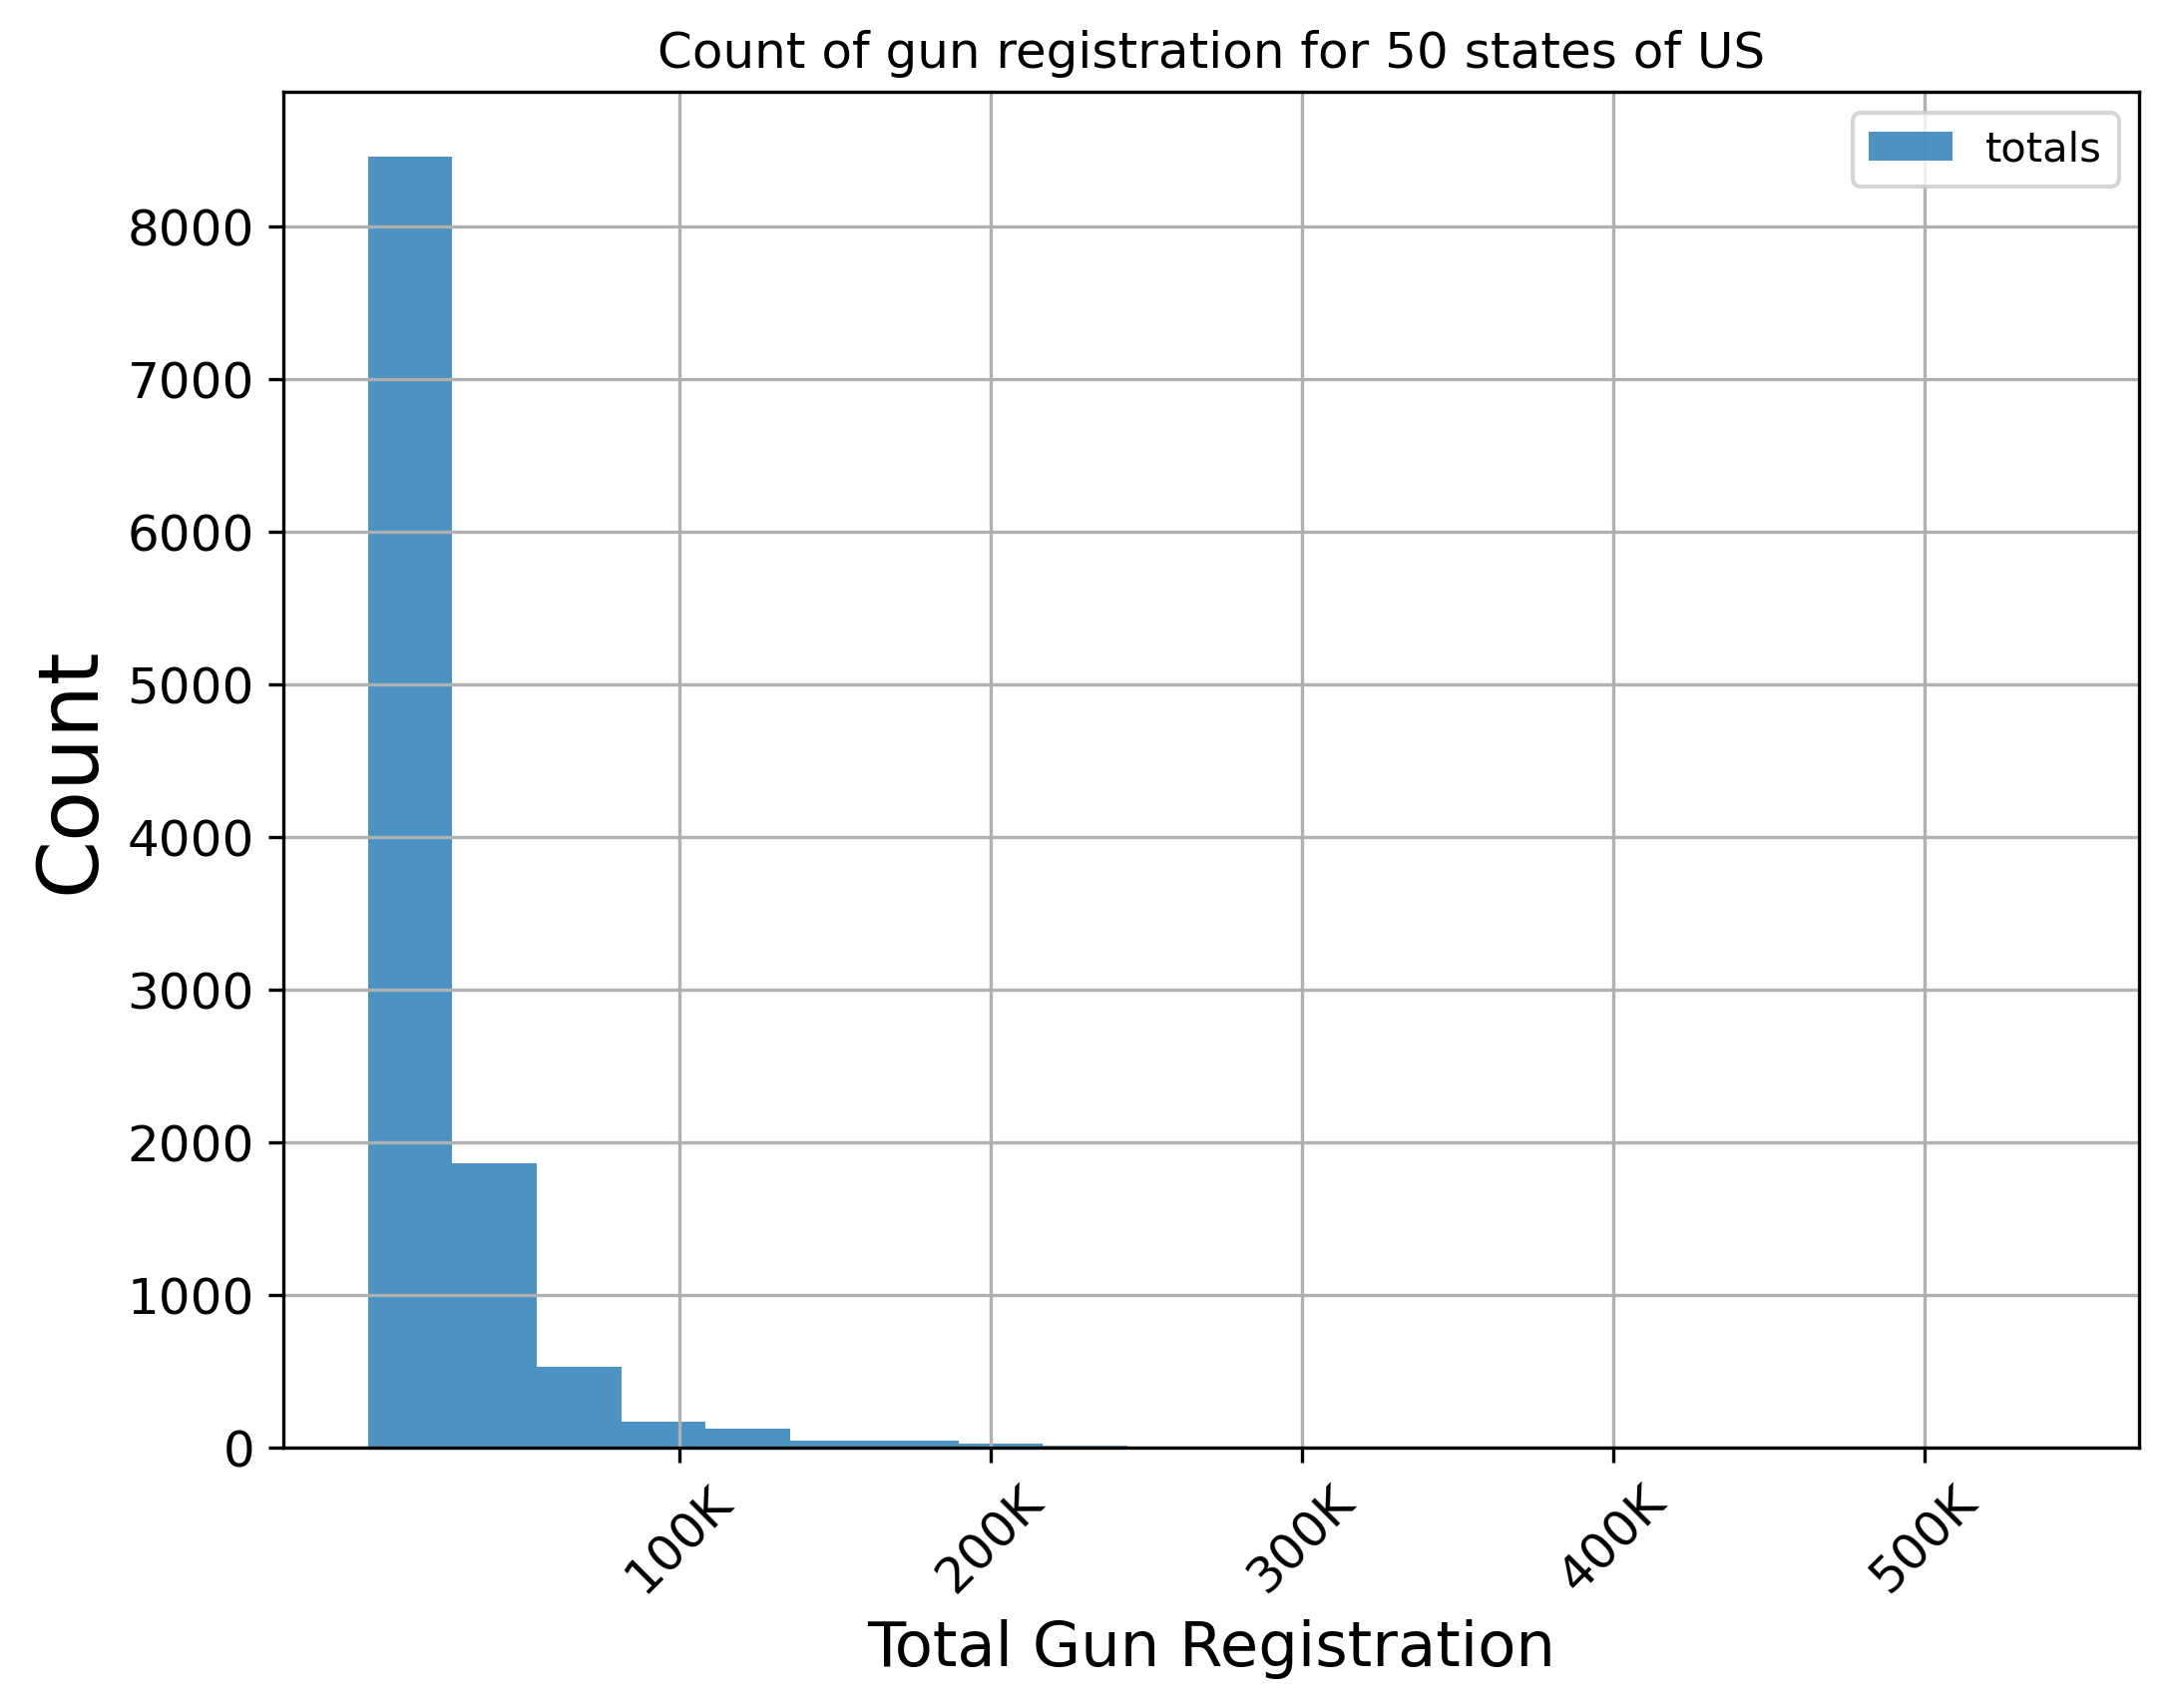

In [46]:
# next thing is to plot histogram looking into the distribution of totals column in these states
gun_dist['totals'].hist(alpha=0.8, label="totals", bins=20, figsize=(8, 6))
plt.xlabel('Total Gun Registration',fontsize=15)
plt.ylabel("Count", fontsize=20)
plt.title("Count of gun registration for 50 states of US")
plt.legend()
plt.xticks([100000, 200000, 300000, 400000, 500000], ["100K", "200K", "300K", "400K", "500K"], rotation=45)
plt.tick_params(labelsize=12);

*Looking into the histogram, most of the data lies within the range 100K. Let us further look into the statistics.*

In [47]:
#mean of the totals of all the states: national mean
national_mean = gun_dist.totals.mean()
min_totals = gun_dist.totals.min()
max_totals = gun_dist.totals.max()
print(national_mean, min_totals, max_totals)

23734.978502202644 6 541978


The national mean is 23K whereas minimum is 6 while maximum is 541K. This means that data has higher variation. Let us further look into the box plot. 

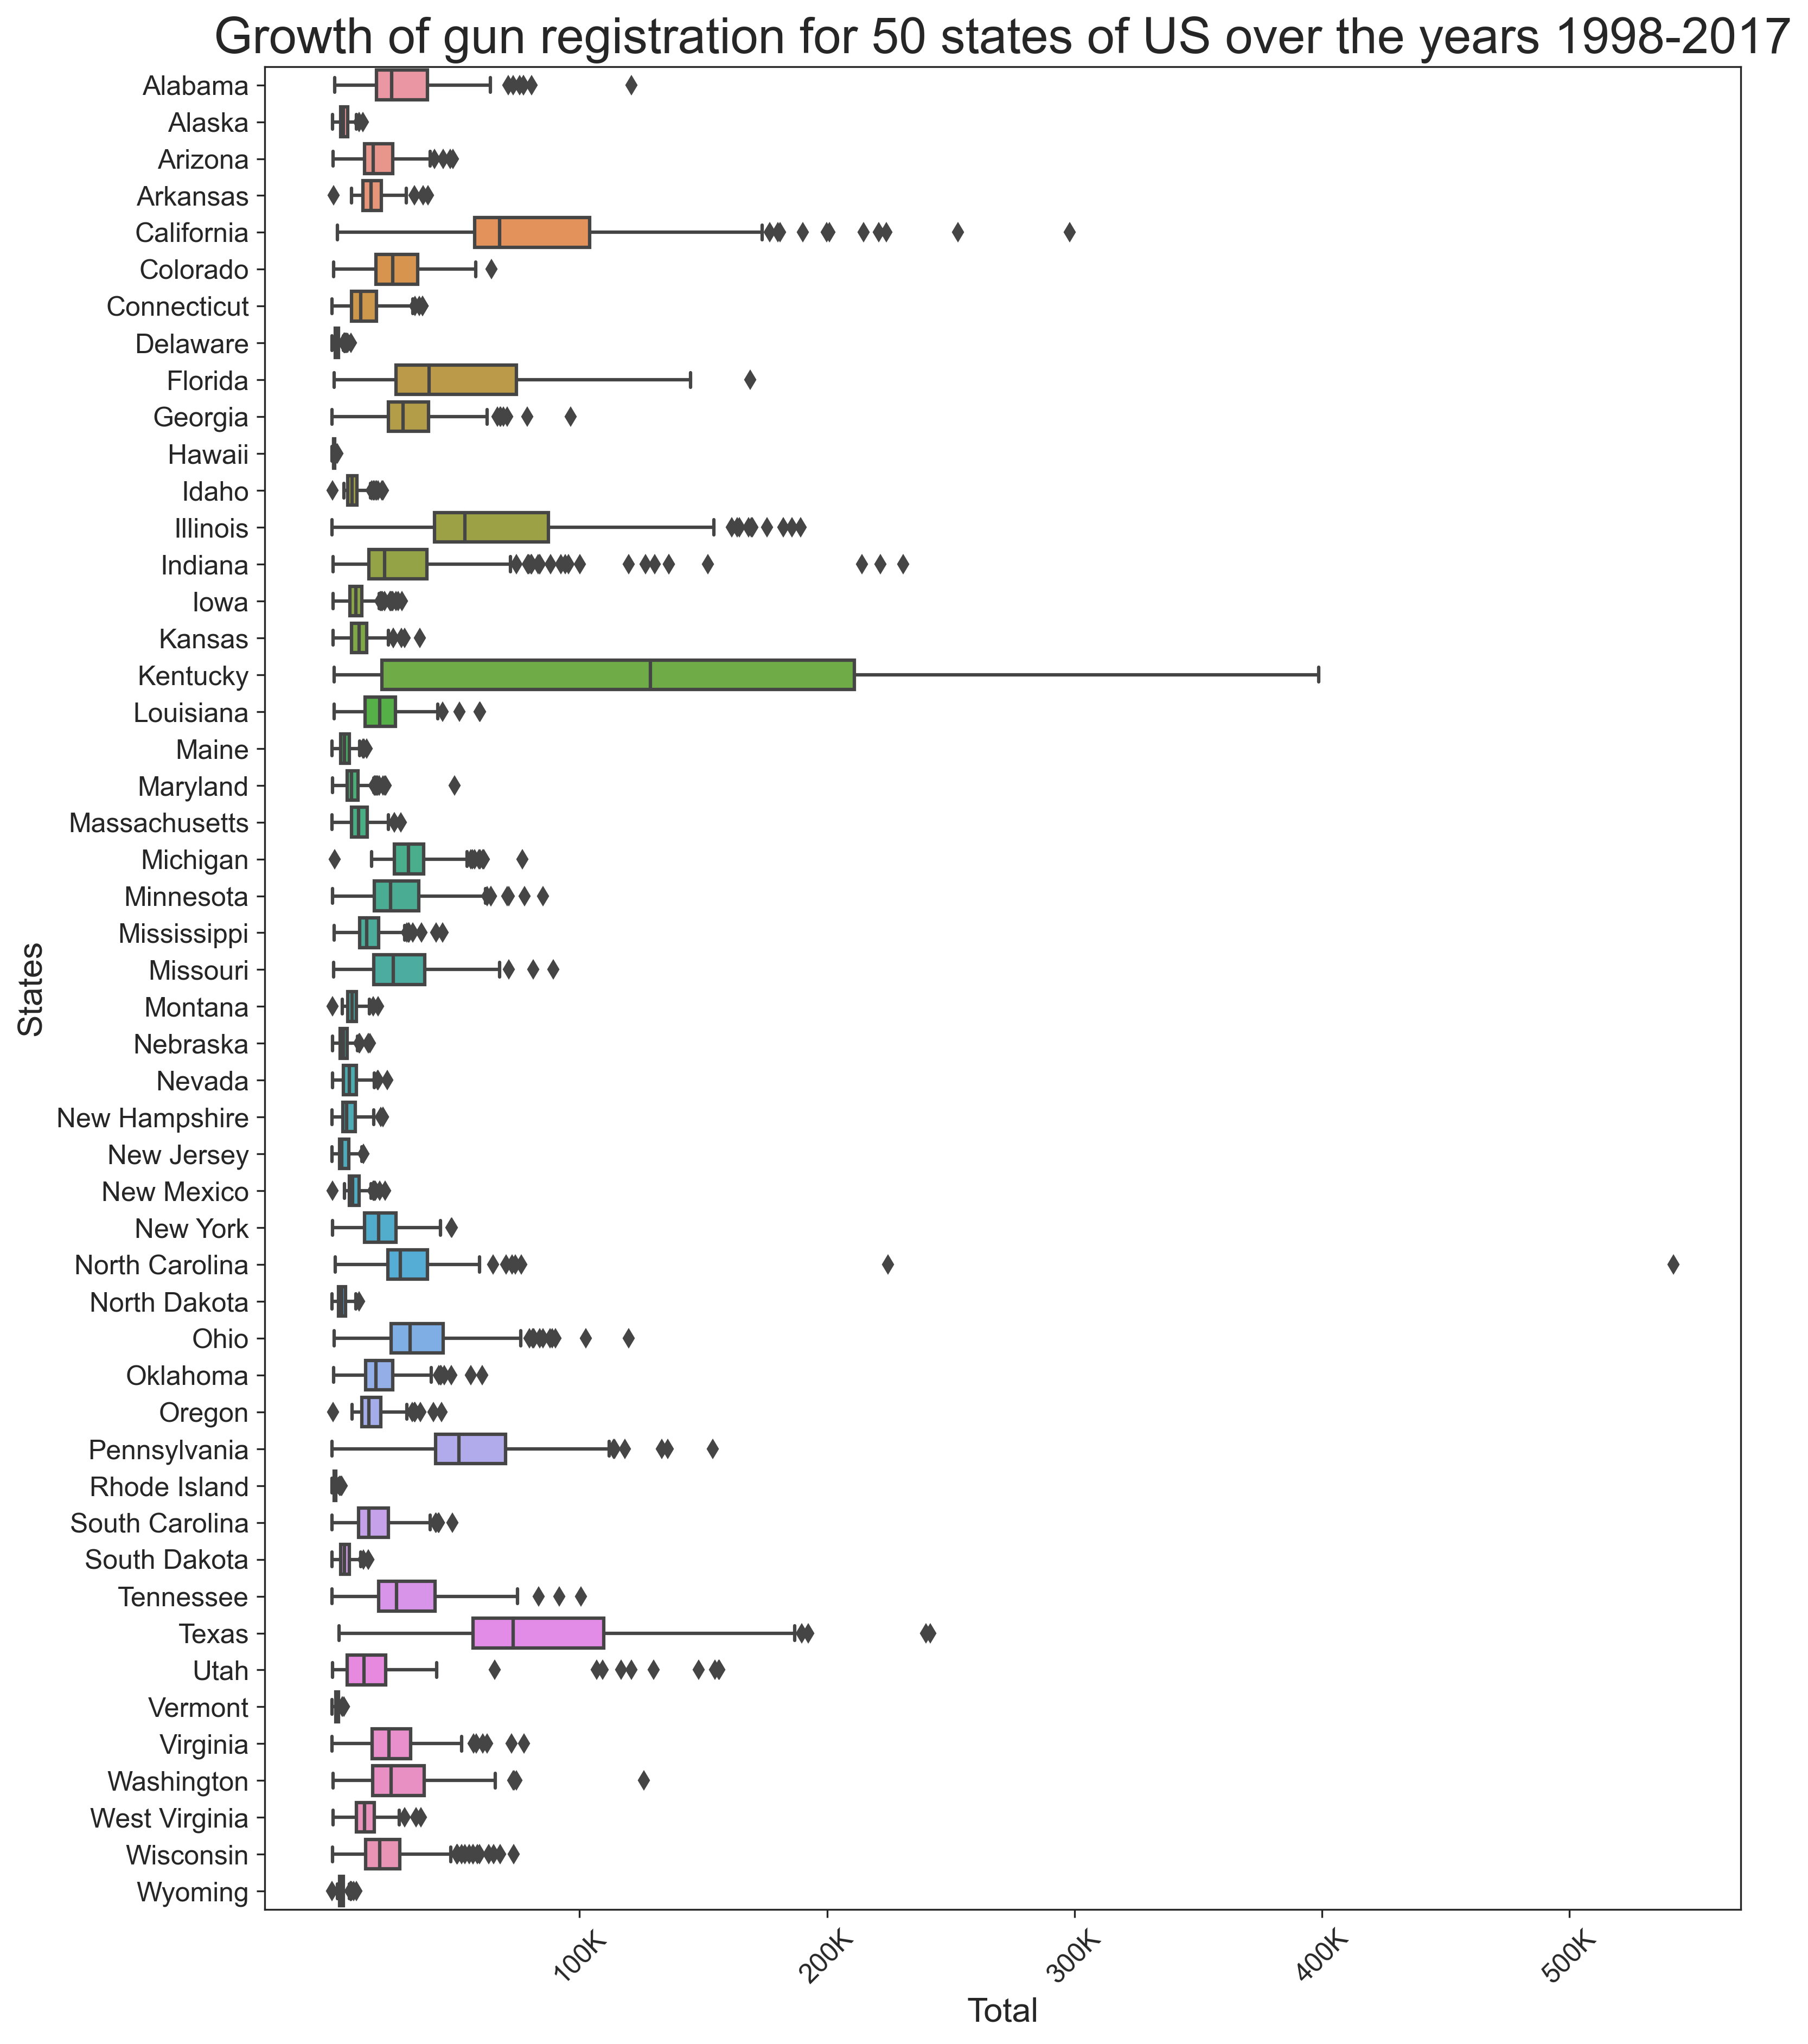

In [48]:
#Looking into box plot to get better understanding of the data distribution
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 15)
sns.boxplot(y='state', x="totals", data=gun_dist, orient="h", ax=ax)
plt.xlabel('Total',fontsize=15)
plt.ylabel("States", fontsize=15)
plt.title("Growth of gun registration for 50 states of US over the years 1998-2017", fontsize=22)
plt.xticks([100000, 200000, 300000, 400000, 500000], ["100K", "200K", "300K", "400K", "500K"], rotation=45)
plt.tick_params(labelsize=12);

Based on this visualisation, Kentucky has increased gun registration. Based on this, I have narrowed down to 10 states namely California, Florida, Illinois, Indiana, Kentucky, North Carolina, Texas, Pennsylvania, Ohio, Utah to see the  distribution over the years.

> Let us look closely at these states looking into the trend from 1998 till 2017.

In [49]:
#Dataframe for selected states 
selected_states = [ "California", "Florida", "Illinois", "Indiana", "Kentucky", "North Carolina", "Texas", "Pennsylvania", "Ohio", "Utah"]

df_selected_states = gun_dist.query('state in @selected_states')
df_selected_states

month           state  totals
4     2017-09-01      California  123506
9     2017-09-01         Florida   77390
14    2017-09-01        Illinois  116449
15    2017-09-01         Indiana   48524
18    2017-09-01        Kentucky  398706
...          ...             ...     ...
12465 1998-11-01  North Carolina    1310
12467 1998-11-01            Ohio     952
12470 1998-11-01    Pennsylvania      17
12476 1998-11-01           Texas    2794
12477 1998-11-01            Utah     267

[2270 rows x 3 columns]

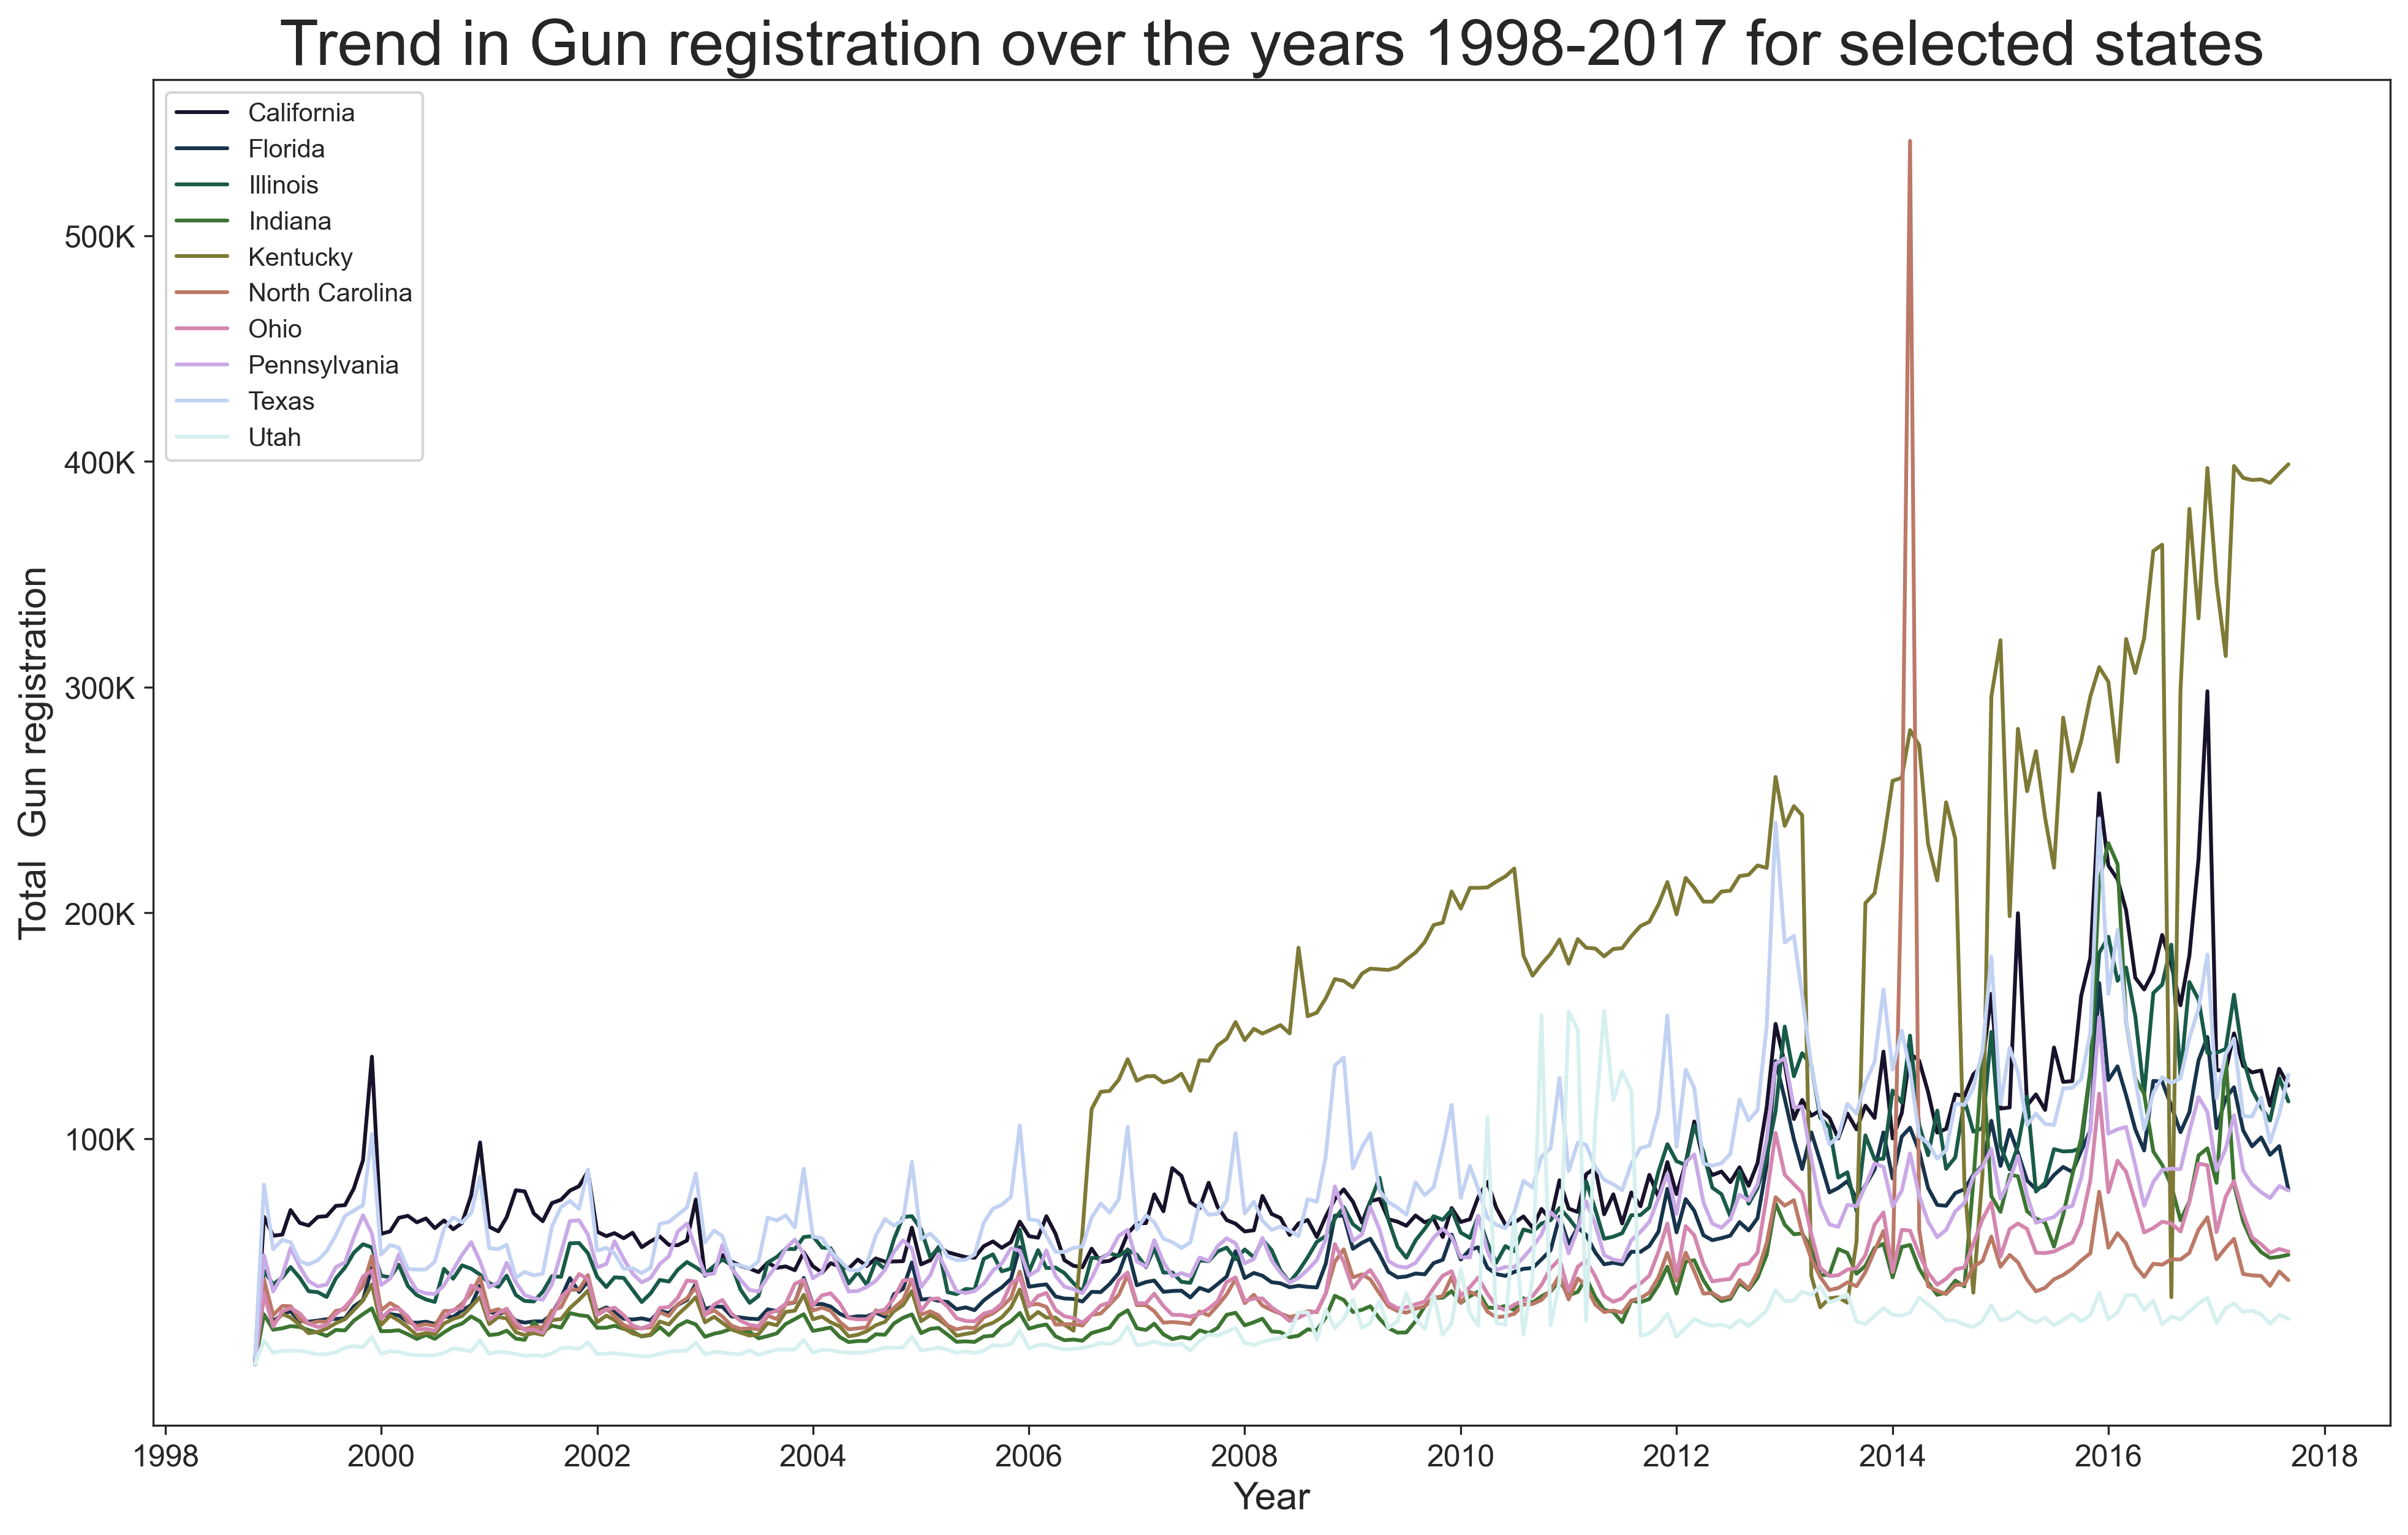

In [50]:
#Line plot showing in total distribution over the years in these selected states
#sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 9.7)
sns.lineplot(y='totals', x="month", data=df_selected_states, hue='state', palette="cubehelix", ax=ax)
plt.legend(loc='upper left')
plt.xlabel('Year',fontsize=15)
plt.ylabel("Total  Gun registration", fontsize=15)
plt.title('Trend in Gun registration over the years 1998-2017 for selected states', fontsize=25)
plt.yticks([100000, 200000, 300000, 400000, 500000], ["100K", "200K", "300K", "400K", "500K"])
plt.tick_params(labelsize=12);

**Looking into the plot, following are points to note:**

1. Kentucky shows the increase in the gun distribution over the years from 1998 to 2018 except in 2017 where it showed the dip.

2. North Carolina shows a sharp increase over 500K for the year 2014 while it is lower in number for the other years.

3. California shows the increase in the distribution mainly after 2012.

4. Texas shows some increase in 2013 and following years while Utah also show the increase for the years 2010-2012. Rest all looks like slight increase in gun registration over the years. 

Now that we look into the plot, selecting only to these five states Kentucky, North Carolina, California, Texas and Utah gives the clear picture of the trend over the years.

In [51]:
#Selction of rows for these 5 selected states to further look into the trend over the years
five_states = ["Kentucky", "North Carolina", "California", "Texas", "Utah"]
df_five_states = gun_dist.query('state in @five_states')
df_five_states

month           state  totals
4     2017-09-01      California  123506
18    2017-09-01        Kentucky  398706
35    2017-09-01  North Carolina   37325
46    2017-09-01           Texas  128260
47    2017-09-01            Utah   20041
...          ...             ...     ...
12434 1998-11-01      California    2101
12448 1998-11-01        Kentucky     840
12465 1998-11-01  North Carolina    1310
12476 1998-11-01           Texas    2794
12477 1998-11-01            Utah     267

[1135 rows x 3 columns]

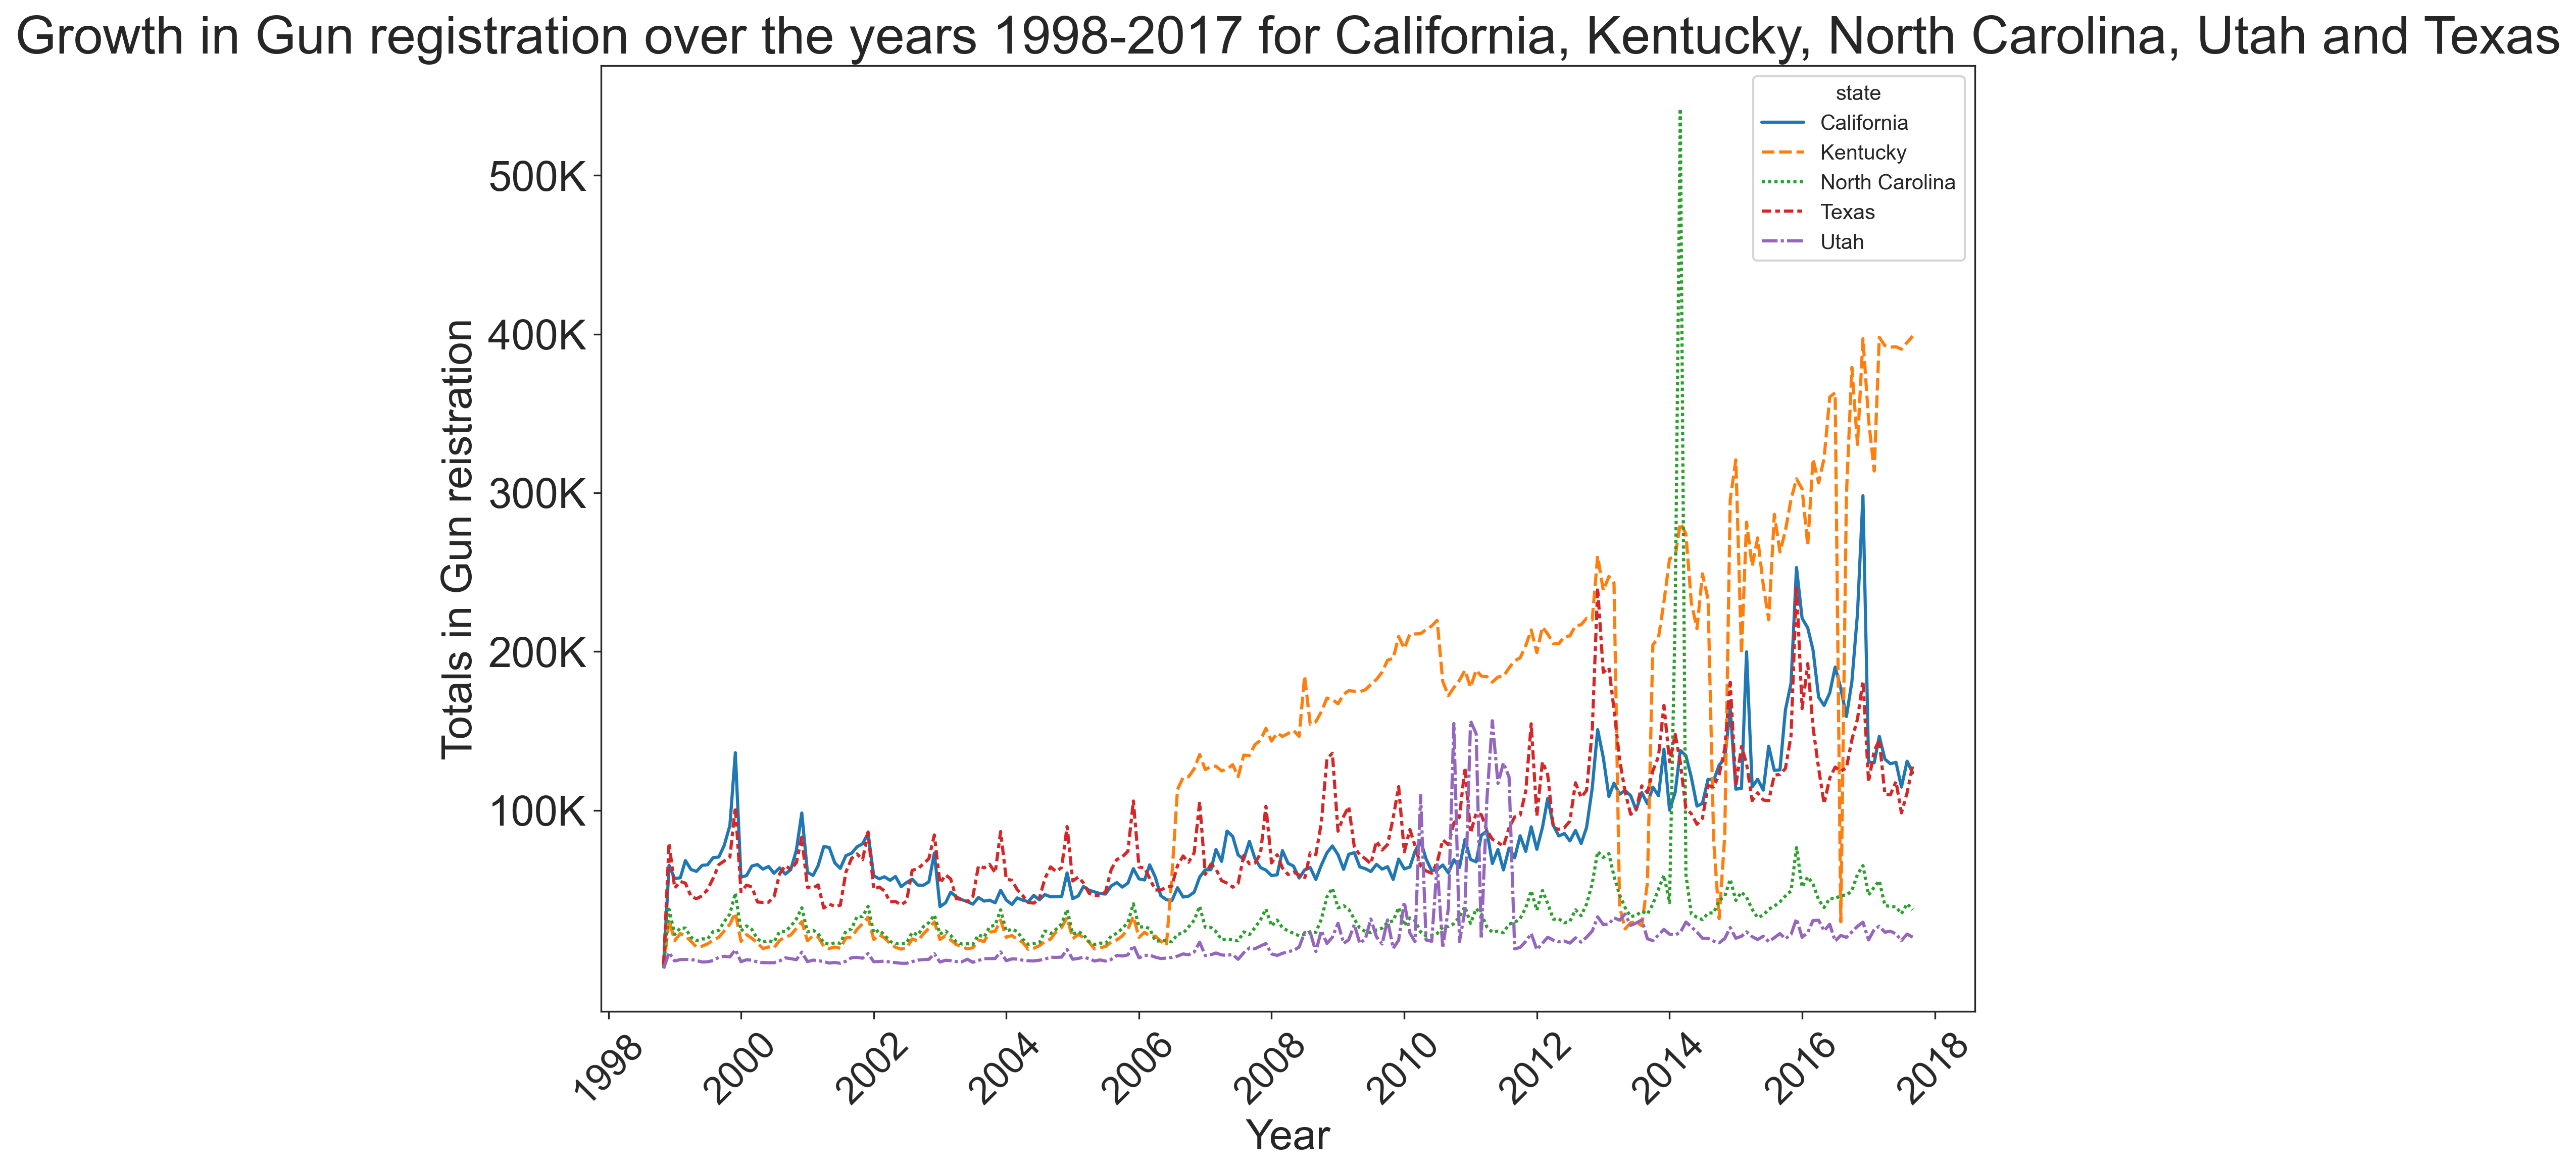

In [52]:
#Line plot of selected states
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax, x="month", y='totals', data=df_five_states, style="state", hue='state')
plt.xlabel('Year',fontsize=20)
plt.ylabel("Totals in Gun reistration", fontsize=20)
plt.title('Growth in Gun registration over the years 1998-2017 for California, Kentucky, North Carolina, Utah and Texas', fontsize=25)
plt.yticks([100000, 200000, 300000, 400000, 500000], ["100K", "200K", "300K", "400K", "500K"], fontsize=20)
ax.tick_params(axis="x", labelsize=18, rotation=45)
ax.tick_params(axis="y", labelsize=20)
plt.show();

1. The plot shows that Utah and North Carolina  has lower registration except for the years 2010-12 for Utah and 2014 for North Carolina.

2. **Kentucky, California and Texas** shows the increase in the gun registration and therefore we will look over these three states for subsequent analysis.

### Research Question 2 : What census data is most associated with high gun per capita?

> We find the states showing highest growth in gun registration, let us look further look into the population of these states and see if there is any impact of population with the gun registration.

> For that, I am choosing three states, **California, Kentucky and Texas** which shows an increase in gun registration.


In [53]:
#looking into the dataset
census.head()

Fact    Alabama    Alaska  \
0       Population estimates, July 1, 2016,  (V2016)  4863300.0  741894.0   
1  Population estimates base, April 1, 2010,  (V2...  4780131.0  710249.0   
6  Persons under 18 years, percent, July 1, 2016,...       22.6      25.2   
7     Persons under 18 years, percent, April 1, 2010       23.7      26.4   
8  Persons 65 years and over, percent,  July 1, 2...       16.1      10.4   

     Arizona   Arkansas  California   Colorado  Connecticut  Delaware  \
0  6931071.0  2988248.0  39250017.0  5540545.0    3576452.0  952065.0   
1  6392301.0  2916025.0  37254522.0  5029324.0    3574114.0  897936.0   
6       23.5       23.6        23.2       22.8         21.1      21.5   
7       25.5       24.4        25.0       24.4         22.9      22.9   
8       16.9       16.3        13.6       13.4         16.1      17.5   

      Florida  ...  South Dakota    Tennessee       Texas       Utah  \
0  20612439.0  ...    865454.000  6651194.000  27862596.0  3051217.0   
1  18804592.0  ...    814195.000  6346298.000  25146100.0  2763888.0   
6        20.1  ...         0.246        0.226        26.2       30.2   
7        21.3  ...         0.249        0.236        27.3       31.5   
8        19.9  ...         0.160        0.157        12.0       10.5   

    Vermont   Virginia  Washington  West Virginia  Wisconsin   Wyoming  
0  624594.0  8411808.0   7288000.0      1831102.0  5778708.0  585501.0  
1  625741.0  8001041.0   6724545.0      1853011.0  5687289.0  563767.0  
6      19.0       22.2        22.4           20.5       22.3      23.7  
7      20.7       23.2        23.5           20.9       23.6      24.0  
8      18.1       14.6        14.8           18.8       16.1      15.0  

[5 rows x 51 columns]

Only first two rows shows the distribution of population for the year 2010 and 2016, let us select those rows and for three cities: Kentucky, California and Texas.

In [54]:
#selection of the data set
#first getting the index position of columns Kentucky, California and Texas
for i, j in enumerate(census.columns):
    print(i,j)

0 Fact
1 Alabama
2 Alaska
3 Arizona
4 Arkansas
5 California
6 Colorado
7 Connecticut
8 Delaware
9 Florida
10 Georgia
11 Hawaii
12 Idaho
13 Illinois
14 Indiana
15 Iowa
16 Kansas
17 Kentucky
18 Louisiana
19 Maine
20 Maryland
21 Massachusetts
22 Michigan
23 Minnesota
24 Mississippi
25 Missouri
26 Montana
27 Nebraska
28 Nevada
29 New Hampshire
30 New Jersey
31 New Mexico
32 New York
33 North Carolina
34 North Dakota
35 Ohio
36 Oklahoma
37 Oregon
38 Pennsylvania
39 Rhode Island
40 South Carolina
41 South Dakota
42 Tennessee
43 Texas
44 Utah
45 Vermont
46 Virginia
47 Washington
48 West Virginia
49 Wisconsin
50 Wyoming


In [55]:
#selection of dataset
census_pop = census.iloc[0:2, [0, 5,17,43]]
census_pop

Fact  California   Kentucky  \
0       Population estimates, July 1, 2016,  (V2016)  39250017.0  4436974.0   
1  Population estimates base, April 1, 2010,  (V2...  37254522.0  4339344.0   

        Texas  
0  27862596.0  
1  25146100.0

Looking into the data, we want to change the columns states to rows and for Fact column, we need to extract the year and population and split in two seperate columns.

In [56]:
# Using replace for extract year and fact from the data
census_pop = census_pop.replace({'Fact': {'Population estimates, July 1, 2016,  (V2016)': 'Population, 2016', 
                                'Population estimates base, April 1, 2010,  (V2016)' : 'Population, 2010'}})
census_pop


Fact  California   Kentucky       Texas
0  Population, 2016  39250017.0  4436974.0  27862596.0
1  Population, 2010  37254522.0  4339344.0  25146100.0

In [57]:
#Then to rename Fact column to Fact,Year before we split into two columns
census_pop = census_pop.rename(columns={'Fact': "Fact, Year"})
census_pop

Fact, Year  California   Kentucky       Texas
0  Population, 2016  39250017.0  4436974.0  27862596.0
1  Population, 2010  37254522.0  4339344.0  25146100.0

In [58]:
#splitting to two seperate columns
census_pop[['Fact', 'Year']] = census_pop['Fact, Year'].str.split(',', expand=True)
census_pop

Fact, Year  California   Kentucky       Texas        Fact   Year
0  Population, 2016  39250017.0  4436974.0  27862596.0  Population   2016
1  Population, 2010  37254522.0  4339344.0  25146100.0  Population   2010

In [59]:
#now we will select only Year, states column of the dataframe
census_pop = census_pop[["Year", "California", "Kentucky", "Texas"]]
census_pop

Year  California   Kentucky       Texas
0   2016  39250017.0  4436974.0  27862596.0
1   2010  37254522.0  4339344.0  25146100.0

In [60]:
#next thing is to use melt method and change to the rows and named dataframe pop 
pop = pd.melt(census_pop, id_vars='Year', var_name='state', value_name='population')
pop

Year       state  population
0   2016  California  39250017.0
1   2010  California  37254522.0
2   2016    Kentucky   4436974.0
3   2010    Kentucky   4339344.0
4   2016       Texas  27862596.0
5   2010       Texas  25146100.0

In [61]:
#looking into the data type
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        6 non-null      object 
 1   state       6 non-null      object 
 2   population  6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [62]:
#changing Year to int object and again looking into the types
pop['Year'] = pop.Year.astype('int')
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        6 non-null      int64  
 1   state       6 non-null      object 
 2   population  6 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


In [63]:
#Creating dataframe for three states showing the registration data and year 2016
three_states = ["California", "Kentucky", "Texas"]
reg_2016 = gun_dist.query('state in @three_states & ((month >= "2016" & month <"2017"))')
reg_2016.shape

(36, 3)

In [64]:
#Creating dataframe for three states showing the registration data and year 2010
reg_2010 = gun_dist.query('state in @three_states & ((month >= "2010" & month <"2011"))')
reg_2010.shape

(36, 3)

In [65]:
#combined 2010 and 2016 dataframes
reg = pd.concat([reg_2010, reg_2016])
reg

month       state  totals
4459 2010-12-01  California   81522
4473 2010-12-01    Kentucky  188188
4501 2010-12-01       Texas  126861
4514 2010-11-01  California   63995
4528 2010-11-01    Kentucky  181908
...         ...         ...     ...
1063 2016-02-01    Kentucky  266913
1091 2016-02-01       Texas  192417
1104 2016-01-01  California  220912
1118 2016-01-01    Kentucky  302383
1146 2016-01-01       Texas  164088

[72 rows x 3 columns]

In [66]:
# extracting year and changing to datetime
reg['month'] = pd.to_datetime(reg['month'], format='%Y')
reg['Year'] = reg['month'].dt.year
#reg['Year']
reg = reg[['Year', 'state', 'totals']]
reg

Year       state  totals
4459  2010  California   81522
4473  2010    Kentucky  188188
4501  2010       Texas  126861
4514  2010  California   63995
4528  2010    Kentucky  181908
...    ...         ...     ...
1063  2016    Kentucky  266913
1091  2016       Texas  192417
1104  2016  California  220912
1118  2016    Kentucky  302383
1146  2016       Texas  164088

[72 rows x 3 columns]

In [67]:
#confirming the selection for the year
reg.Year.unique()

array([2010, 2016])

In [68]:
#looking into the types of the columns for each of the dataframe
reg.info()
pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 4459 to 1146
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    72 non-null     int64 
 1   state   72 non-null     object
 2   totals  72 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        6 non-null      int64  
 1   state       6 non-null      object 
 2   population  6 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


In [69]:
#combining pop and refined guns registration data set
df = pop.merge(reg, how='inner', on=('Year', 'state'))
df

Year       state  population  totals
0   2016  California  39250017.0  298161
1   2016  California  39250017.0  224039
2   2016  California  39250017.0  180968
3   2016  California  39250017.0  159077
4   2016  California  39250017.0  176770
..   ...         ...         ...     ...
67  2010       Texas  25146100.0   61789
68  2010       Texas  25146100.0   65012
69  2010       Texas  25146100.0   77795
70  2010       Texas  25146100.0   87849
71  2010       Texas  25146100.0   73787

[72 rows x 4 columns]

In [70]:
#creating a mask for year 2010 and 2016
pop_2010 =  df.query('Year == 2010')
pop_2016 = df.query('Year == 2016')
pop_2016.shape

(36, 4)

Now that we got the dataframe for the year 2010 and 2016 with population and gun registration. Let us look into how gun registration varies with population for these states.

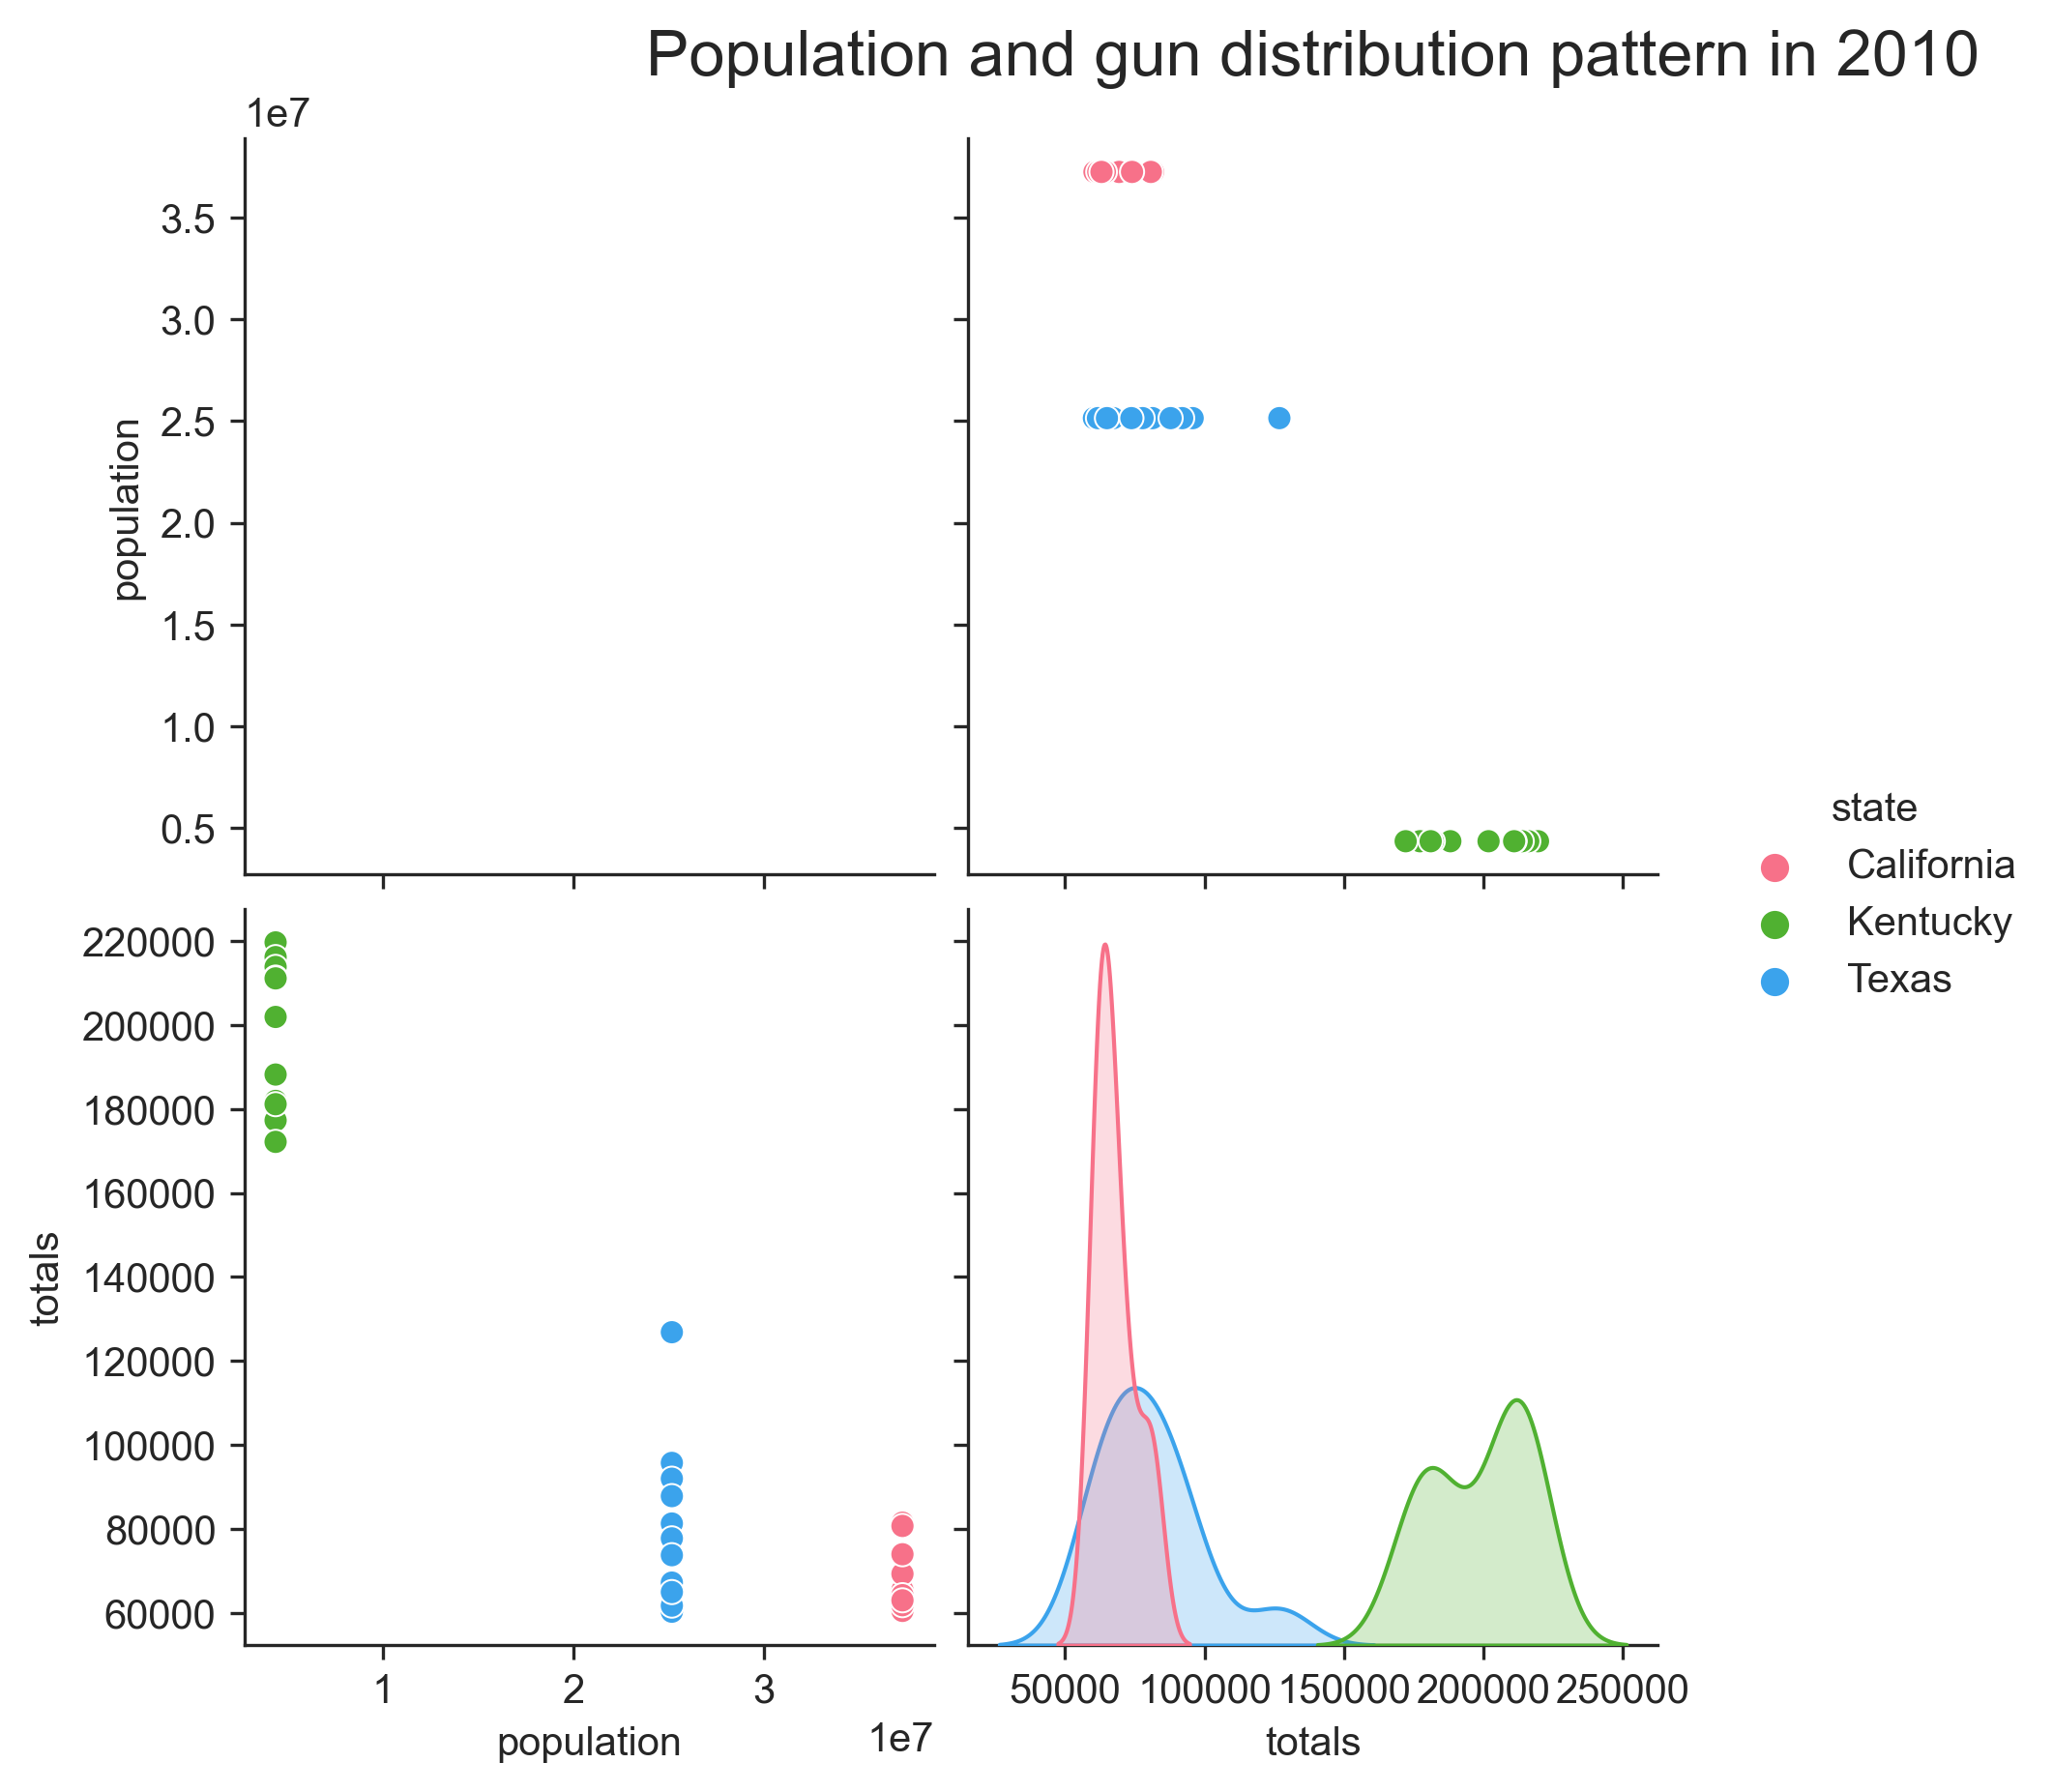

In [71]:
#distribution of gun registration with population in 2010 using pairplot
plt.rcParams['figure.figsize']=5,5
sns.pairplot(pop_2010, vars=['population', 'totals'], hue='state', palette='husl', height=3)
plt.title('Population and gun distribution pattern in 2010', y=2.1, fontsize = 16)

plt.show();

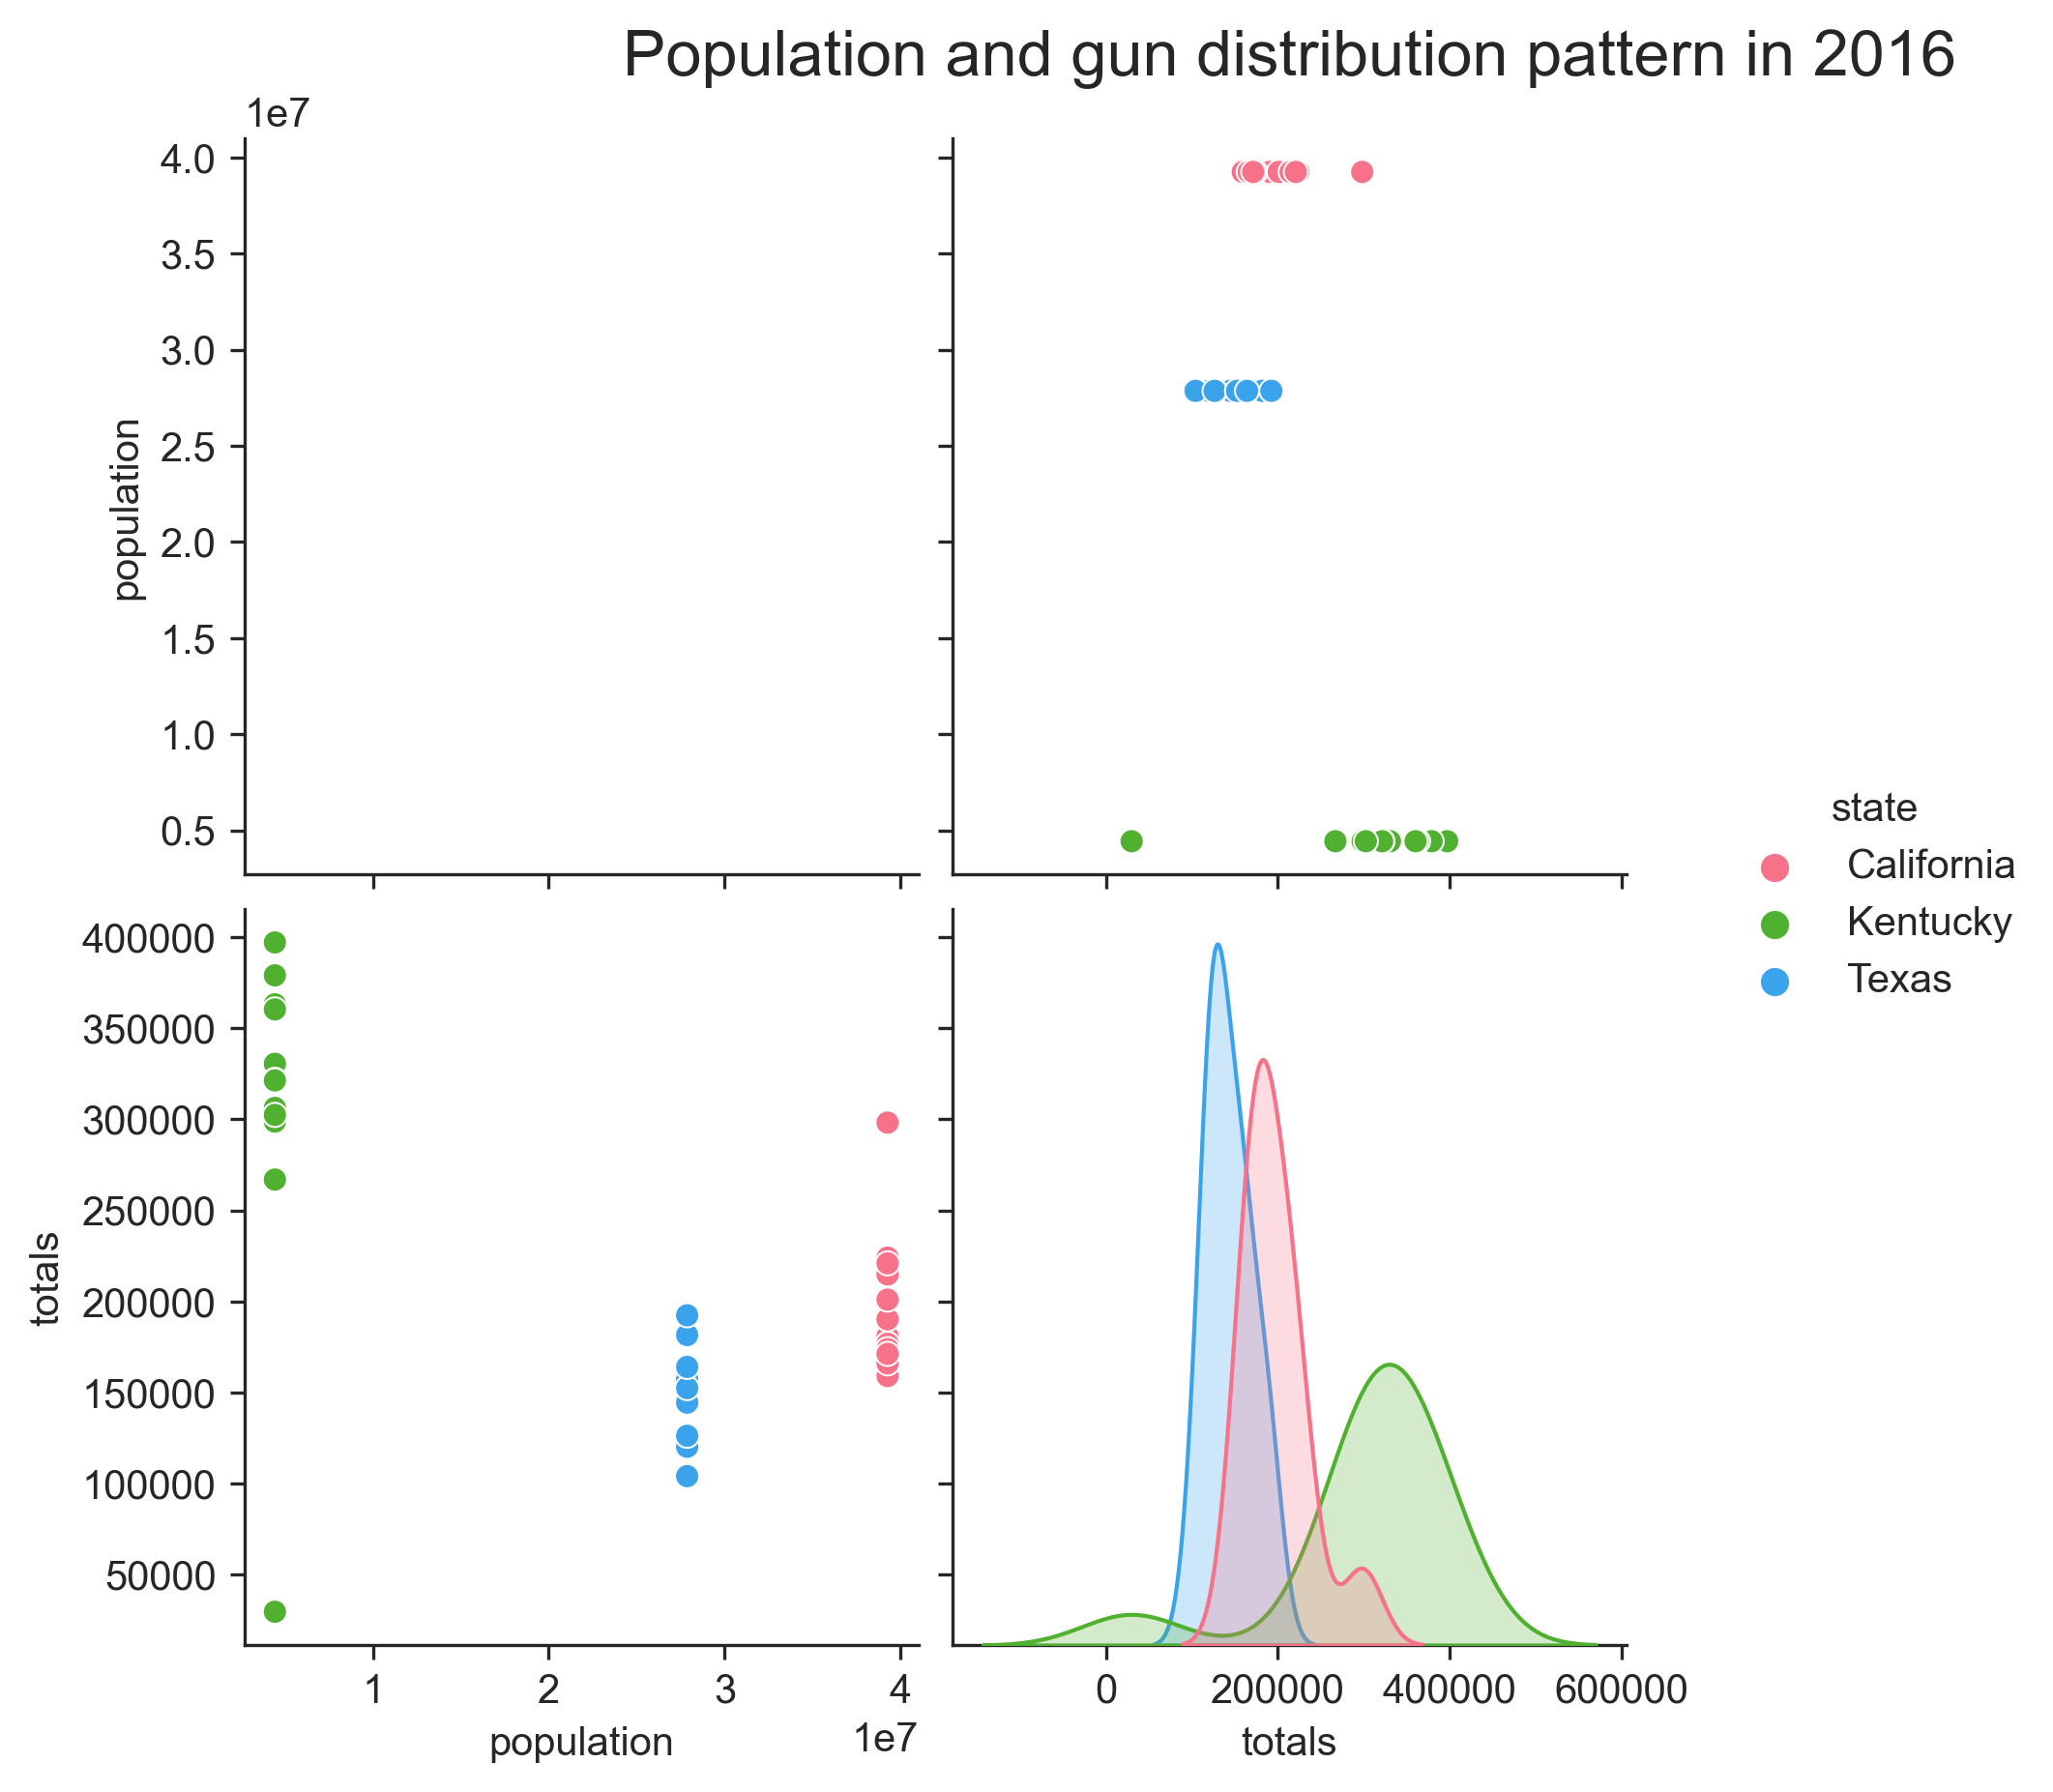

In [72]:
#distribution of gun registration with population in 2016 
sns.pairplot(pop_2016, vars=['population', 'totals'], hue='state', palette='husl', height=3)
plt.title('Population and gun distribution pattern in 2016', y=2.1, fontsize = 16)
plt.show();


**Summary from the pairplot graphs for states California, Kentucky and Texas for the years 2010 and 2016**

1. The population data from census column is given one data point for the complete year while gun registration data is available for all 12 months for the year 2010 and 2016. This is shown for each of the 12 points corresponding to the population data. 

2. The plots clearly shows that the total gun registration is higher in 2016 as compared to 2010 for all these states.

3. The other point is for Kentucky, the gun registration has increased from 2010 to 2016 although the population is not that high compared to other states California and Texas.

4. For California and Texas, there is increase in population and the gun registration as well. Although this figure gives some insight about the gun registration pattern with population, more census data is required to provide better insights about the correlation.

> **Looking into the statistics for years 2010 and 2016:**



In [73]:
#Mean gun registration and population for 2016
summary_2010 = pop_2010.groupby('state')['population', 'totals'].mean()
summary_2010

population         totals
state                                
California  37254522.0   68033.250000
Kentucky     4339344.0  198798.250000
Texas       25146100.0   80672.583333

In [74]:
#Mean gun registration and population for 2016
summary_2016 = pop_2016.groupby('state')['population', 'totals'].mean()
summary_2016

population         totals
state                                
California  39250017.0  198097.250000
Kentucky     4436974.0  306403.916667
Texas       27862596.0  143477.166667

In [75]:
# net change from 2010
inc = summary_2016 - summary_2010
inc

population         totals
state                                
California   1995495.0  130064.000000
Kentucky       97630.0  107605.666667
Texas        2716496.0   62804.583333

**There is an increase in gun registration and population from 2010 to 2016. However, California and Kentucky shows an increase of more than 100K registration although population of Kentucky increase by 97K while population in California increase by approx 200K.**

### Role of income level with the gun registration


In [76]:
census

Fact    Alabama    Alaska  \
0        Population estimates, July 1, 2016,  (V2016)  4863300.0  741894.0   
1   Population estimates base, April 1, 2010,  (V2...  4780131.0  710249.0   
6   Persons under 18 years, percent, July 1, 2016,...       22.6      25.2   
7      Persons under 18 years, percent, April 1, 2010       23.7      26.4   
8   Persons 65 years and over, percent,  July 1, 2...       16.1      10.4   
9   Persons 65 years and over, percent, April 1, 2010       13.8       7.7   
12       White alone, percent, July 1, 2016,  (V2016)       69.3      66.1   
13  Black or African American alone, percent, July...       26.8       3.8   
14  American Indian and Alaska Native alone, perce...        0.7      15.2   
15       Asian alone, percent, July 1, 2016,  (V2016)        1.4       6.3   
16  Native Hawaiian and Other Pacific Islander alo...        0.1       1.3   
17  Two or More Races, percent, July 1, 2016,  (V2...        1.6       7.3   
18  Hispanic or Latino, percent, July 1, 2016,  (V...        4.2       7.0   
19  White alone, not Hispanic or Latino, percent, ...       65.8      61.2   
34  High school graduate or higher, percent of per...       84.3      92.1   
35  Bachelor's degree or higher, percent of person...       23.5      28.0   
47  Median household income (in 2015 dollars), 201...    43623.0   72515.0   
48  Per capita income in past 12 months (in 2015 d...    24091.0   33413.0   

      Arizona   Arkansas  California   Colorado  Connecticut  Delaware  \
0   6931071.0  2988248.0  39250017.0  5540545.0    3576452.0  952065.0   
1   6392301.0  2916025.0  37254522.0  5029324.0    3574114.0  897936.0   
6        23.5       23.6        23.2       22.8         21.1      21.5   
7        25.5       24.4        25.0       24.4         22.9      22.9   
8        16.9       16.3        13.6       13.4         16.1      17.5   
9        13.8       14.4        11.4       10.9         14.2      14.4   
12       83.3       79.4        72.7       87.5         80.6      70.1   
13        4.9       15.7         6.5        4.5         11.8      22.6   
14        5.4        1.0         1.7        1.6          0.5       0.6   
15        3.4        1.6        14.8        3.3          4.7       4.0   
16        0.3        0.3         0.5        0.2          0.1       0.1   
17        2.8        2.0         3.8        3.0          2.3       2.6   
18       30.9        7.3        38.9       21.3         15.7       9.2   
19       55.5       72.9        37.7       68.6         67.7      62.9   
34       86.0       84.8        81.8       90.7         89.9      88.4   
35       27.5       21.1        31.4       38.1         37.6      30.0   
47    50255.0    41371.0     61818.0    60629.0      70331.0   60509.0   
48    25848.0    22798.0     30318.0    32217.0      38803.0   30554.0   

       Florida  ...  South Dakota    Tennessee       Texas       Utah  \
0   20612439.0  ...    865454.000  6651194.000  27862596.0  3051217.0   
1   18804592.0  ...    814195.000  6346298.000  25146100.0  2763888.0   
6         20.1  ...         0.246        0.226        26.2       30.2   
7         21.3  ...         0.249        0.236        27.3       31.5   
8         19.9  ...         0.160        0.157        12.0       10.5   
9         17.3  ...         0.143        0.134        10.3        9.0   
12        77.6  ...         0.852        0.787        79.4       91.1   
13        16.8  ...         0.020        0.171        12.6        1.4   
14         0.5  ...         0.090        0.004         1.0        1.6   
15         2.9  ...         0.015        0.018         4.8        2.5   
16         0.1  ...         0.001        0.001         0.1        1.0   
17         2.1  ...         0.023        0.019         1.9        2.5   
18        24.9  ...         0.037        0.052        39.1       13.8   
19        54.9  ...         0.825        0.742        42.6       78.8   
34        86.9  ...         0.909        0.855        81.9      

In [77]:
#selection of dataset
census_income = census.iloc[-2:, [0, 5, 17,43]]
census_income

Fact  California  Kentucky  \
47  Median household income (in 2015 dollars), 201...     61818.0   43740.0   
48  Per capita income in past 12 months (in 2015 d...     30318.0   24063.0   

      Texas  
47  53207.0  
48  26999.0

In [78]:
#looking into the details of the fact column showing the year
census_income.Fact.unique()

array(['Median household income (in 2015 dollars), 2011-2015',
       'Per capita income in past 12 months (in 2015 dollars), 2011-2015'],
      dtype=object)

In [79]:
# Using replace for extract year and fact from the data
census_income = census_income.replace({'Fact': {'Median household income (in 2015 dollars), 2011-2015': 'household_income, 2011-2015', 
                                'Per capita income in past 12 months (in 2015 dollars), 2011-2015' : 'percapita_income, 2011-2015'}})
census_income

Fact  California  Kentucky    Texas
47  household_income, 2011-2015     61818.0   43740.0  53207.0
48  percapita_income, 2011-2015     30318.0   24063.0  26999.0

In [80]:
#rename the Fact column
census_income = census_income.rename(columns={'Fact': "Fact, Year"})
census_income

Fact, Year  California  Kentucky    Texas
47  household_income, 2011-2015     61818.0   43740.0  53207.0
48  percapita_income, 2011-2015     30318.0   24063.0  26999.0

In [81]:
#splitting to two seperate columns
census_income[['Fact', 'Year']] = census_income['Fact, Year'].str.split(',', expand=True)
census_income

Fact, Year  California  Kentucky    Texas  \
47  household_income, 2011-2015     61818.0   43740.0  53207.0   
48  percapita_income, 2011-2015     30318.0   24063.0  26999.0   

                Fact        Year  
47  household_income   2011-2015  
48  percapita_income   2011-2015

In [82]:
#now we will select only Year, states column of the dataframe
census_income = census_income[["Fact", "California", "Kentucky", "Texas"]]
census_income

Fact  California  Kentucky    Texas
47  household_income     61818.0   43740.0  53207.0
48  percapita_income     30318.0   24063.0  26999.0

In [83]:
#next thing is to use melt method and change to the rows
income = pd.melt(census_income, id_vars='Fact', var_name='state', value_name='income')
income

Fact       state   income
0  household_income  California  61818.0
1  percapita_income  California  30318.0
2  household_income    Kentucky  43740.0
3  percapita_income    Kentucky  24063.0
4  household_income       Texas  53207.0
5  percapita_income       Texas  26999.0

In [84]:
#next thing is to filter the rows of guns registration dataset for the years 2011 till 2015
#combining with guns registration dataset for 2016
three_states = ["California", "Kentucky", "Texas"]
reg_2015 = gun_dist.query('state in @three_states & ((month >= "2011" & month <"2016"))')
reg_2015 = reg_2015[['state', 'totals']]
reg_2015

state  totals
1159  California  252946
1173    Kentucky  308824
1201       Texas  241791
1214  California  180116
1228    Kentucky  295891
...          ...     ...
4363    Kentucky  188375
4391       Texas   98234
4404  California   68984
4418    Kentucky  177464
4446       Texas   85642

[180 rows x 2 columns]

In [85]:
#combining income and refined guns registration data set for the years 2011 till 2015
df_income = income.merge(reg_2015, how='inner', on=('state'))
df_income

Fact       state   income  totals
0    household_income  California  61818.0  252946
1    household_income  California  61818.0  180116
2    household_income  California  61818.0  163211
3    household_income  California  61818.0  125441
4    household_income  California  61818.0  125122
..                ...         ...      ...     ...
355  percapita_income       Texas  26999.0   81733
356  percapita_income       Texas  26999.0   87448
357  percapita_income       Texas  26999.0   97274
358  percapita_income       Texas  26999.0   98234
359  percapita_income       Texas  26999.0   85642

[360 rows x 4 columns]

In [86]:
#Looking into the california dataset to check if merge is done correctly
df_income.query('(state == "California") & (Fact == "household_income")')

Fact       state   income  totals
0   household_income  California  61818.0  252946
1   household_income  California  61818.0  180116
2   household_income  California  61818.0  163211
3   household_income  California  61818.0  125441
4   household_income  California  61818.0  125122
5   household_income  California  61818.0  140365
6   household_income  California  61818.0  112704
7   household_income  California  61818.0  119574
8   household_income  California  61818.0  114686
9   household_income  California  61818.0  199833
10  household_income  California  61818.0  113789
11  household_income  California  61818.0  113292
12  household_income  California  61818.0  164170
13  household_income  California  61818.0  132469
14  household_income  California  61818.0  128439
15  household_income  California  61818.0  118856
16  household_income  California  61818.0  119570
17  household_income  California  61818.0  104309
18  household_income  California  61818.0  102639
19  household_income  California  61818.0  120661
20  household_income  California  61818.0  134448
21  household_income  California  61818.0  137660
22  household_income  California  61818.0  111341
23  household_income  California  61818.0  100054
24  household_income  California  61818.0  138522
25  household_income  California  61818.0  109140
26  household_income  California  61818.0  114595
27  household_income  California  61818.0  104067
28  household_income  California  61818.0  111132
29  household_income  California  61818.0  100114
30  household_income  California  61818.0  109153
31  household_income  California  61818.0  112464
32  household_income  California  61818.0  110149
33  household_income  California  61818.0  117106
34  household_income  California  61818.0  108666
35  household_income  California  61818.0  133187
36  household_income  California  61818.0  150805
37  household_income  California  61818.0  113832
38  household_income  California  61818.0   89164
39  household_income  California  61818.0   79077
40  household_income  California  61818.0   87291
41  household_income  California  61818.0   80683
42  household_income  California  61818.0   85384
43  household_income  California  61818.0   83820
44  household_income  California  61818.0   90368
45  household_income  California  61818.0  107573
46  household_income  California  61818.0   89188
47  household_income  California  61818.0   75418
48  household_income  California  61818.0   89592
49  household_income  California  61818.0   74118
50  household_income  California  61818.0   83926
51  household_income  California  61818.0   70043
52  household_income  California  61818.0   76162
53  household_income  California  61818.0   62387
54  household_income  California  61818.0   75317
55  household_income  California  61818.0   66457
56  household_income  California  61818.0   87052
57  household_income  California  61818.0   84183
58  household_income  California  61818.0   67480
59  household_income  California  61818.0   68984

 While looking into the California dataset, because we have only one household income for every state from the census dataset which is $61818, therefore all the income corresponding to the total gun registration for years 2011-2015 is the same.

In [87]:
# to show there is only one household income value for each state from census dataset
census[census.Fact == 'Median household income (in 2015 dollars), 2011-2015']

Fact  Alabama   Alaska  \
47  Median household income (in 2015 dollars), 201...  43623.0  72515.0   

    Arizona  Arkansas  California  Colorado  Connecticut  Delaware  Florida  \
47  50255.0   41371.0     61818.0   60629.0      70331.0   60509.0  47507.0   

    ...  South Dakota  Tennessee    Texas     Utah  Vermont  Virginia  \
47  ...       50957.0    45219.0  53207.0  60727.0  55176.0   65015.0   

    Washington  West Virginia  Wisconsin  Wyoming  
47     61062.0        41751.0    53357.0  58840.0  

[1 rows x 51 columns]

In [88]:
# Creating mask for household income
household = df_income.Fact == 'household_income'
household

0       True
1       True
2       True
3       True
4       True
       ...  
355    False
356    False
357    False
358    False
359    False
Name: Fact, Length: 360, dtype: bool

In [89]:
# Creating mask for per capita income
per_capita = df_income.Fact == 'percapita_income'
per_capita

0      False
1      False
2      False
3      False
4      False
       ...  
355     True
356     True
357     True
358     True
359     True
Name: Fact, Length: 360, dtype: bool

In [90]:
# Data representing the median guns registration and per capita income (in USD) for the years 2011-2015.
df_income[per_capita].groupby('state')['totals', 'income'].median()

totals   income
state                        
California  109651.0  30318.0
Kentucky    214013.5  24063.0
Texas       113715.0  26999.0

> The statistics shows the per capita income for Kentucky is least, however the gun registration is maximum. California has high per capita income but gun registration is least compared to other two states.  

In [91]:
# Data representing the median guns registration and houshold income (in USD) for the years 2011-2015.
df_income[household].groupby('state')['totals', 'income'].median()

totals   income
state                        
California  109651.0  61818.0
Kentucky    214013.5  43740.0
Texas       113715.0  53207.0

> Similarly for median household income is least for Kentucky, however the gun registration is maximum. California has high median income but gun registration is least compared to other two states. 


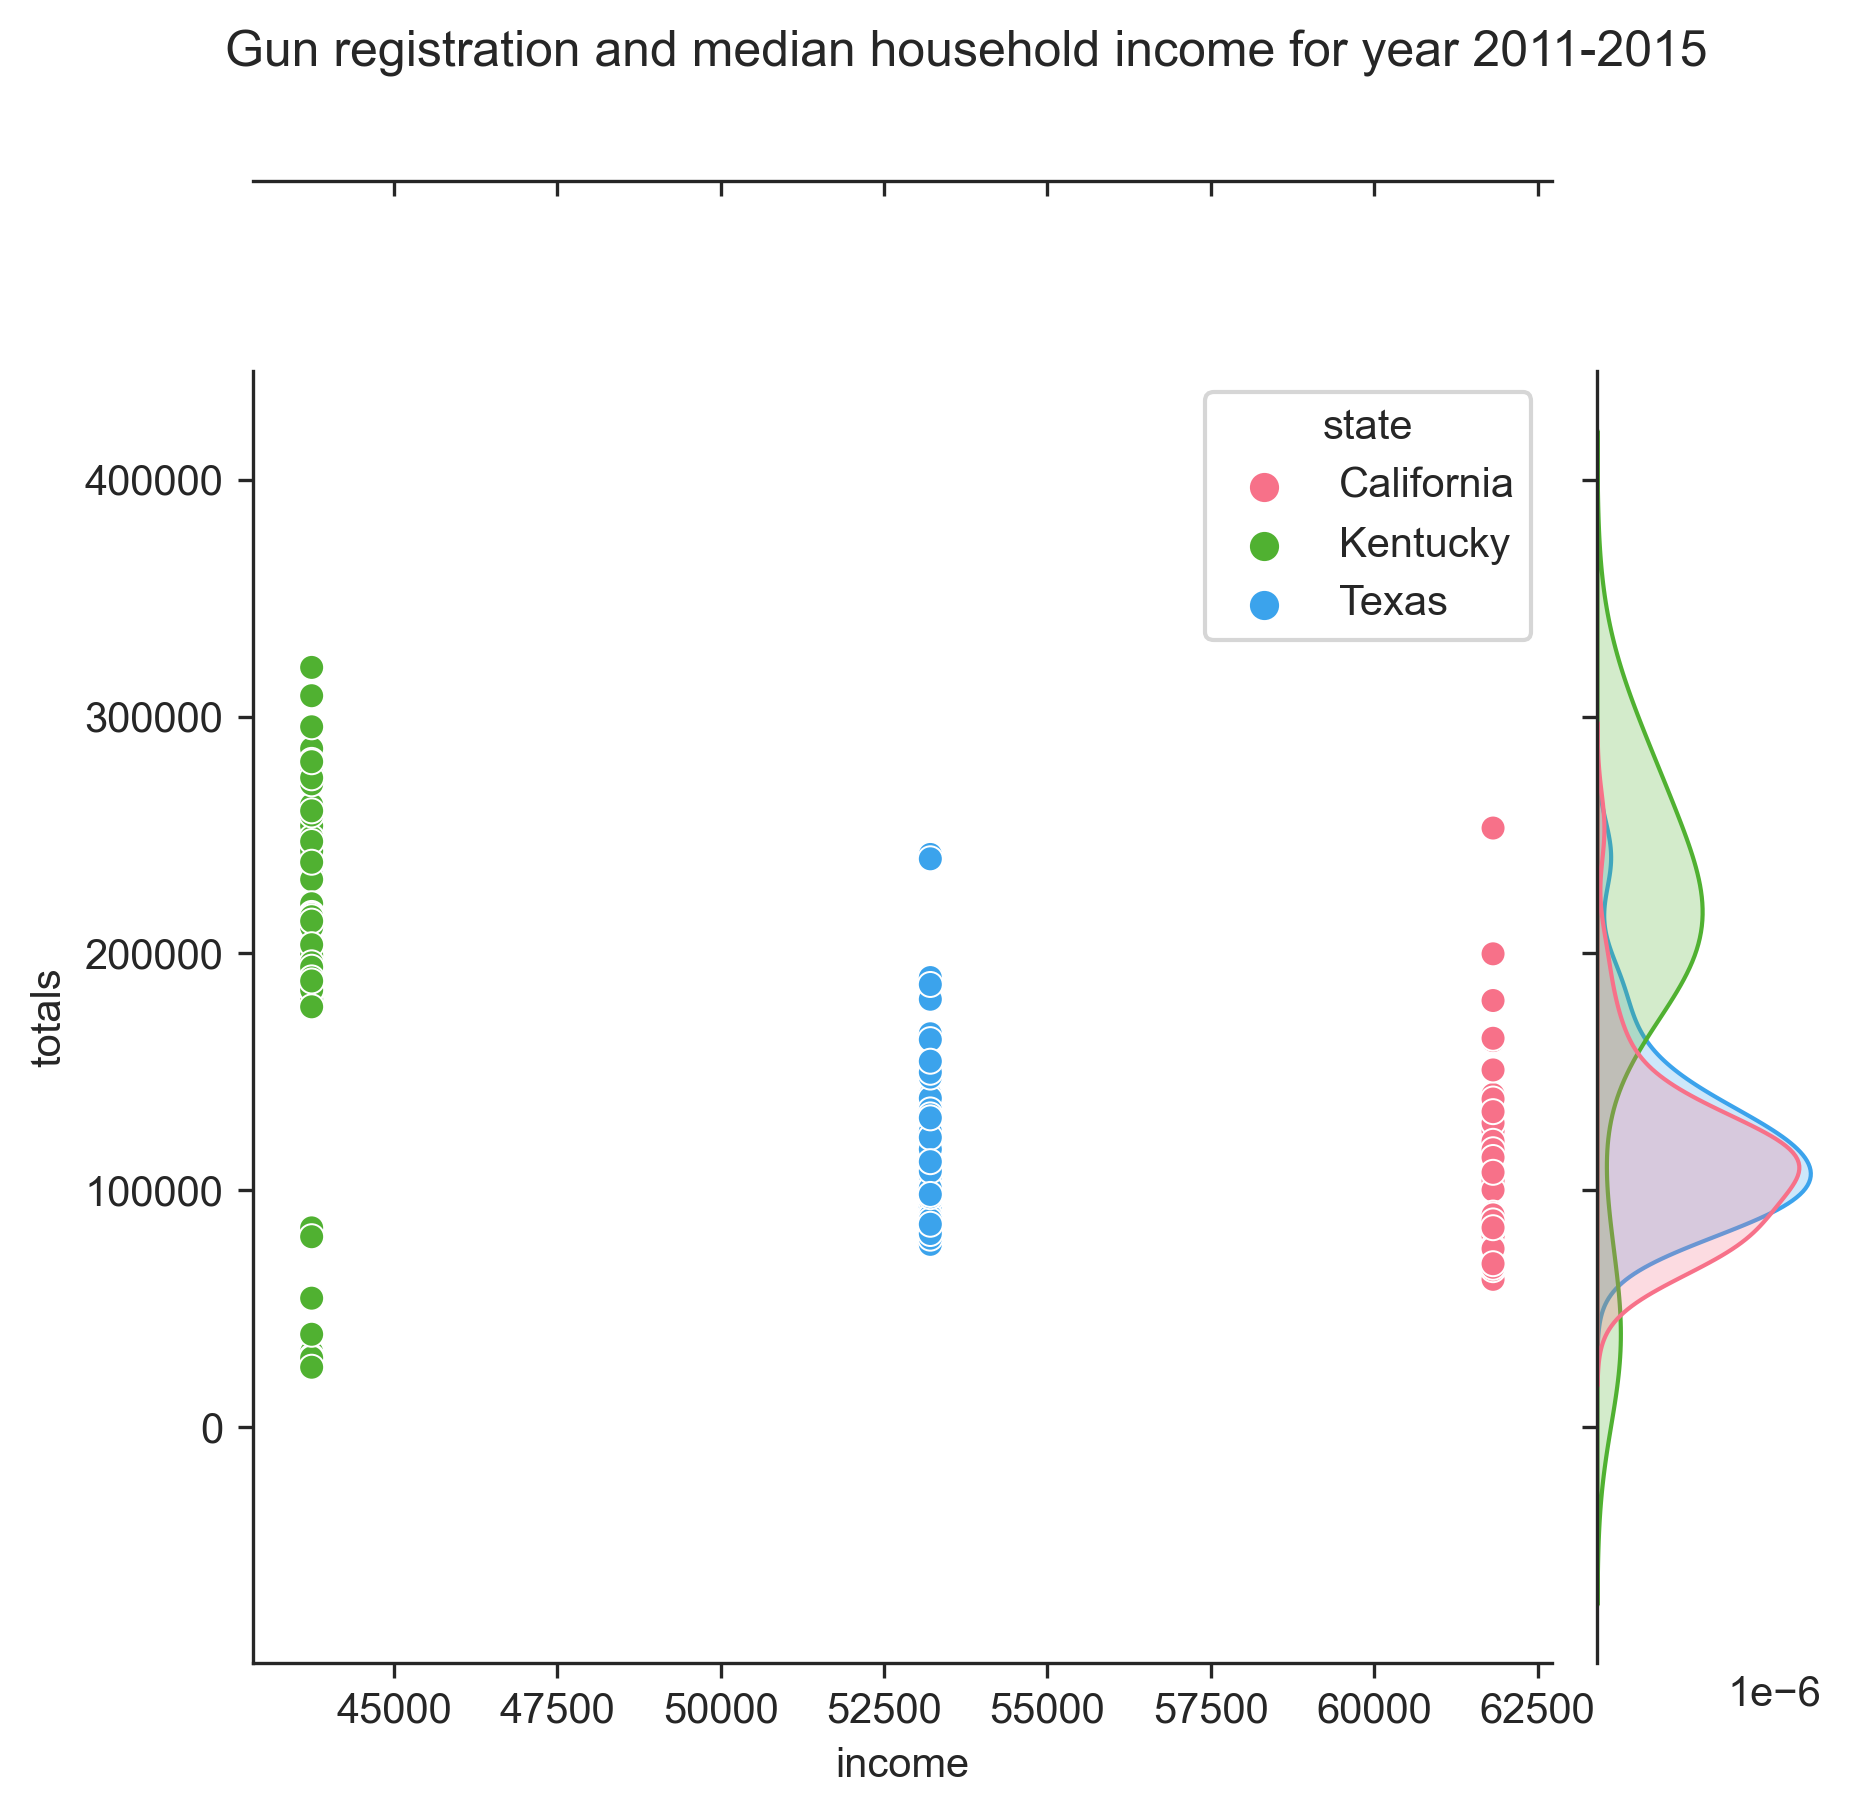

In [92]:
# Plot showing the relationship of income with the registration

sns.jointplot(x="income", y="totals", data=df_income.query('Fact == "household_income"'), hue='state', palette='husl')
plt.suptitle('Gun registration and median household income for year 2011-2015', y=1)
plt.subplots_adjust(hspace = 1.8)
plt.show();

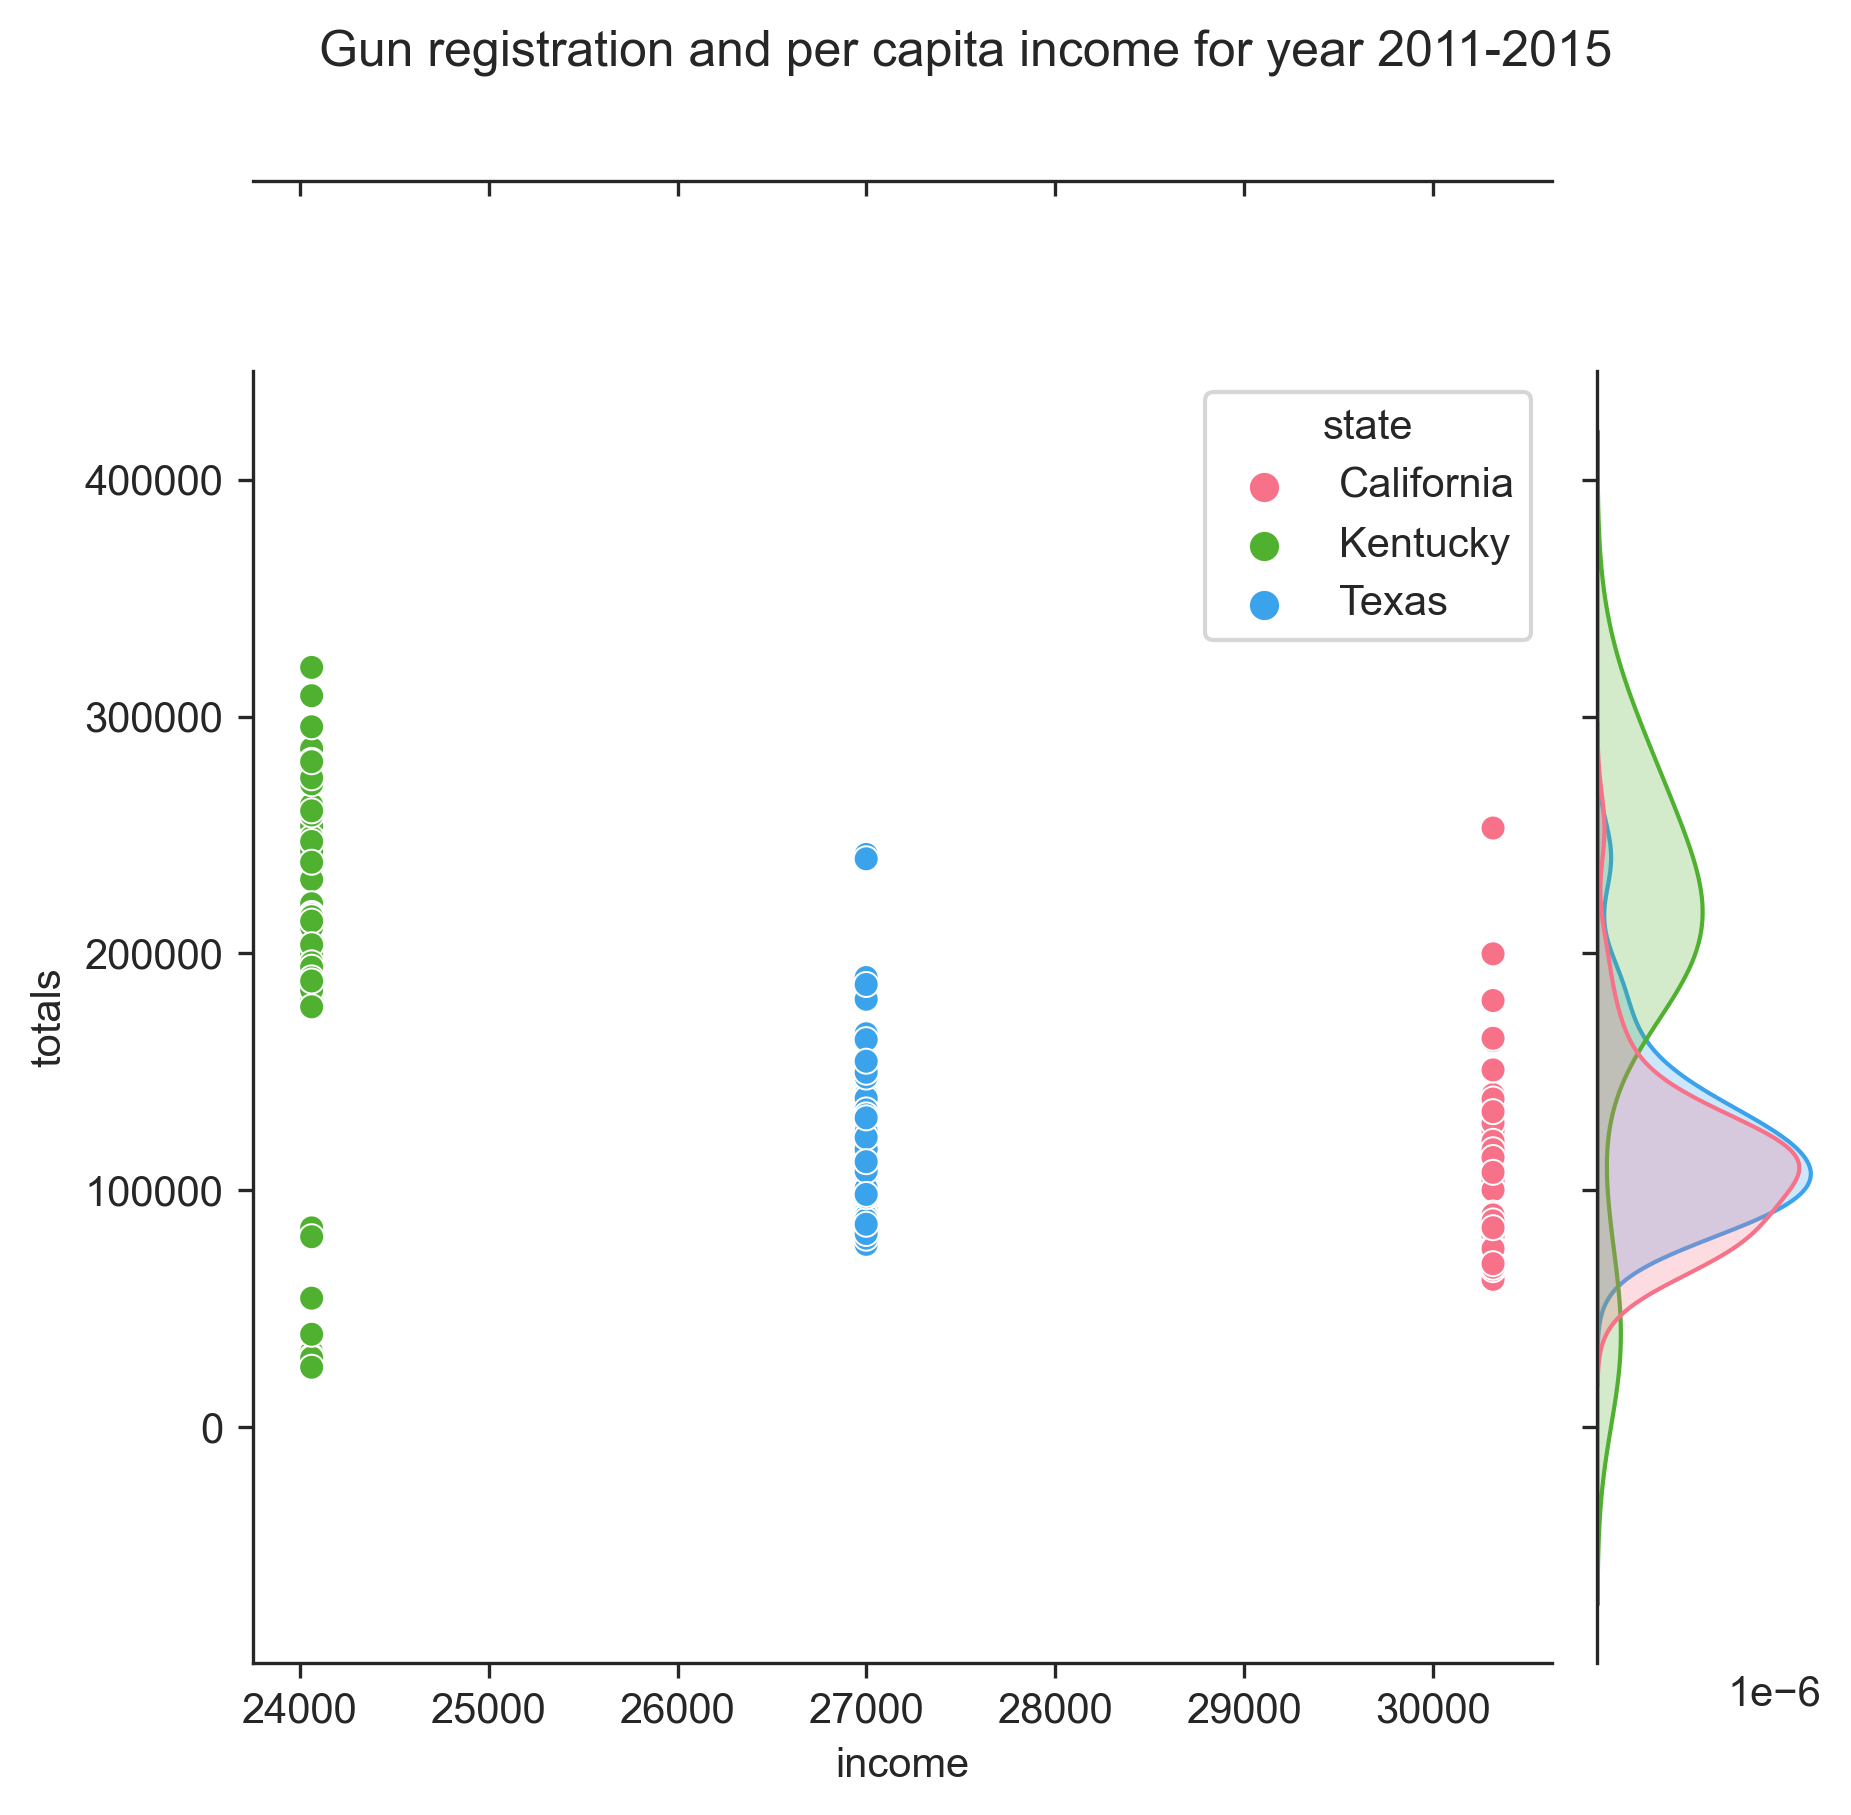

In [93]:
# Joint plot showing relationship between  total gun registration and per capita income 
sns.jointplot(x="income", y="totals", data=df_income.query('Fact == "percapita_income"'), hue='state', palette='husl')
plt.suptitle('Gun registration and per capita income for year 2011-2015', y=1)
plt.subplots_adjust(hspace = 1.8)
plt.show();

Both jointplots for median household income and per capita income (in USD) shows that Kentucky has higher gun registration although the income is least.

## Conclusions

**Results**

1. Exploratory data analysis of these datasets highlights the trend for the guns registration over the years for all the states of US.

2. Interesting results are observed for **Kentucky** showing the higher gun registration over the years. Further analysis is done with the population and income insights.

3. The data also shows that North Carolina shows low gun registration except for the year 2014 which shows more than 500K registrations. 

4. Other states have also higher gun registration over the years although the total is less than 100K.

**Limitations**

1. The descriptive statistics of population and income with the gun registration for different states provide some insights, however the correlation is weak. This means that further hypothesis testing needs to be done to prove if there is strong correlation between those variables.

2. Various transactions for gun registration has a lot of missing data. More detailed insights would have been derived if we used different statistical ways for filling those null values and find the correlation using hypothesis testing.

3. Also, as we can see that there is only one data point corresponding to each Fact column of census. More data on census would have provided a clear picture about these correlations.